In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import os
import random
from pathlib import Path

In [2]:
# The endpoint from this cell is sanity check "debugging". If the files contain the features we are looking for, we go deeper in our investigation.

#path the folder that host the whole files
folder = "/Users/abdulkhaleqaydin/Projects/university/Master_Journey_Project/_datasets/raw"

#Since we have the file that host the mojourity of Volve dataset, lets explorer the folder as a whole
filelist = glob(os.path.join(folder, "*time.csv"))

#we'll search for the features that our pipeline will built on top of it
keywords = ["torque", "hook", "rpm", "standpipe", "pit", "block", "depth"]

#loop over each keyword
for key in keywords:
    print(f"\n=== Searching for: {key} ===\n")
    search = key.lower()
    #Now,lets loop over each file
    for j in filelist:
        filename = pd.read_csv(j, nrows=1) # read only headers
        cols = [c for c in filename.columns if search in c.lower()]
        if cols: #matching cols
            print("File:", os.path.basename(j))
            for c in cols:
                print(" ", c)


=== Searching for: torque ===

File: Norway-Statoil-NO 15_$47$_9-F-11 B time.csv
  Torque Offset - Tare N.m
  Torque - Corrected N.m
  Torque - Average N.m
  Surface Torque Average N.m
  Torque In Amps A
  Surface Torque Average N.m.1
  Torque In Amps A.1
  Torque In Amps A.2
  Torque In Amps A.3
  Surface Torque Average N.m.2
File: Norway-Statoil-15_$47$_9-F-12 time.csv
  Average Surface Torque kN.m
  Maximum Surface Torque kN.m
  Maximum Surface Torque 
File: NA-NA-15_$47$_9-F-5 time.csv
  Average Surface Torque kN.m
File: Norway-NA-15_$47$_9-F-1 time.csv
  Average Surface Torque kN.m
File: Norway-Statoil-NO 15_$47$_9-F-9 time.csv
  Surface Torque Average N.m
  Torque In Amps A
  Torque In Amps A.1
  Torque In Amps A.2
  Surface Torque Average N.m.1
  Surface Torque Average N.m.2
  Torque In Amps A.3
File: Norway-Statoil-15_$47$_9-F-7 time.csv
  Average Surface Torque kN.m
  Maximum Surface Torque 
File: Norway-Statoil-NO 15_$47$_9-F-5 time.csv
  Surface Torque Average N.m
  Torque 

In [3]:
#Lets see the fiels sizes
import os
from glob import glob
import pandas as pd


#a list for time serise files in the folder
filelist = glob(os.path.join(folder, "*time.csv"))

summary = []

#loop over every file path in the list "filelist"
for j in filelist:
    header_df = pd.read_csv(j, nrows=0)
    cols = len(header_df.columns)

    #initialise counters for the file
    total_rows = 0
    total_na = 0     #<=Total NaN, the missing values !!
    total_cells = 0

    #Since some files are giagantic and loading them will be problemetic, we'll split the loading into chuncks
    for chunk in pd.read_csv(j, chunksize=100_000):
        total_rows += len(chunk)
        total_na += chunk.isna().sum().sum()
        total_cells += chunk.size

    avg_missing = total_na / total_cells if total_cells > 0 else 0.0

    summary.append({
        "file": os.path.basename(j),
        "rows": total_rows,
        "cols": cols,
        "avg_missing": avg_missing,   # fraction between 0 and 1
    })

#convert the list of dicts into a dataframe for further processing
info = pd.DataFrame(summary)
#create a new col for percentages for interpretability
info["missing_pct"] = info["avg_missing"] * 100
info


/var/folders/gl/pl22yqg96dj0r59jq4jrpls80000gn/T/ipykernel_8613/409208922.py:23: DtypeWarning: Columns (1,18) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(j, chunksize=100_000):
/var/folders/gl/pl22yqg96dj0r59jq4jrpls80000gn/T/ipykernel_8613/409208922.py:23: DtypeWarning: Columns (18,126) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(j, chunksize=100_000):
/var/folders/gl/pl22yqg96dj0r59jq4jrpls80000gn/T/ipykernel_8613/409208922.py:23: DtypeWarning: Columns (18,126) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(j, chunksize=100_000):
/var/folders/gl/pl22yqg96dj0r59jq4jrpls80000gn/T/ipykernel_8613/409208922.py:23: DtypeWarning: Columns (18,126,222) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(j, chunksize=100_000):
/var/folders/gl/pl22yqg96dj0r59jq4jrpls80000gn/T/ipyke

,file,rows,cols,avg_missing,missing_pct
0,Norway-Statoil-NO 15_$47$_9-F-11 B time.csv,4278693,481,0.892795,89.279466
1,Norway-Statoil-15_$47$_9-F-12 time.csv,2086733,253,0.844364,84.436365
2,NA-NA-15_$47$_9-F-5 time.csv,118988,66,0.239742,23.974203
3,Norway-NA-15_$47$_9-F-1 time.csv,68043,116,0.617886,61.788590
4,Norway-Statoil-NO 15_$47$_9-F-9 time.csv,113271,231,0.788544,78.854443
5,Norway-Statoil-15_$47$_9-F-7 time.csv,547786,135,0.678834,67.883388
6,Norway-Statoil-NO 15_$47$_9-F-5 time.csv,1181641,231,0.792524,79.252358
7,Norway-Statoil-NO 15_$47$_9-F-4 time.csv,522850,231,0.783150,78.315045
8,Norway-StatoilHydro-15_$47$_9-F-15 time.csv,778239,289,0.824015,82.401479
9,Norway-StatoilHydro-15_$47$_9-F-14 time.csv,1655166,245,0.808852,80.885215


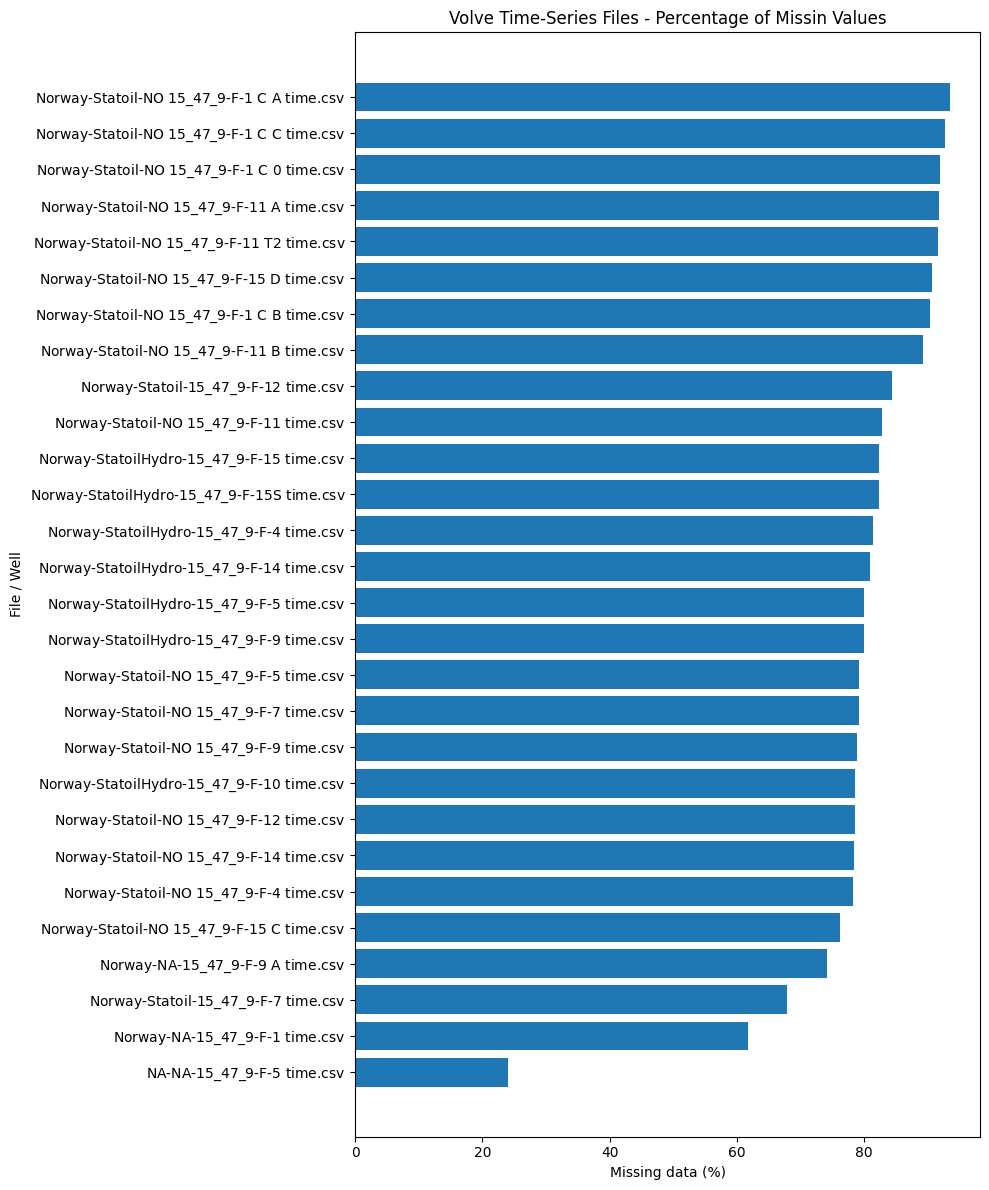

In [4]:
#sort the files by missign percentages
info_sorted = info.sort_values("missing_pct", ascending=False)
#we'll plot all the files
subset = info_sorted

plt.figure(figsize=(10, 12))
plt.barh(subset["file"], subset["missing_pct"])

plt.xlabel("Missing data (%)")
plt.ylabel("File / Well")
plt.title("Volve Time-Series Files - Percentage of Missin Values")

# invert the yaxis, to see the highest missing values at top
plt.gca().invert_yaxis()
plt.tight_layout()

plt.show()

# Figure: Illustrates the percentage of missing data for each Volve Time-Based wells
### Lets interprate this bar chart
### First: Each bar of these "blue lines" represents a well from our Volve Dataset.
- X-Axis - > represents precentage of the "missing Data"
- Y-Axis - > represents the wells (sorted, from most missing to the lowest)

* This "Bar-Chart" correspons to the Missing-Values in the recorded logs for each of these wells from Volve wells. 
## Interpertations:
1. The Top-bars represents the => Worst Logs, around 90%-92% is missing ! as in case (Norway-Statoil-NO 15_$47$_9-F-1 C C  and  Norway-Statoil-NO 15_$47$_9-F-1 C A )
2. The Bottom-Bars represents the => Best Logs, as we can see in case (NA-NA-15_$47$_9-F-5 with 21% missing and Norway-NA-15_$47$_9-F-1  with 61% missing).
3. Most wells having missing data between 70-90% which is a bit an issue except one with 24% and another one with 62%.
4. This processing confimrs that Volve Time-Based Dataset is suffering from recordered log values of various wells.
5. In this case, we'll take well (NA-NA-15_$47$_9-F-5 ) as our start candidate for training, where for well (Norway-NA-15_$47$_9-F-1 ) we need to work around to solve the missing data issues. Finally, for the rest wells, we'll try to use some of them like wells (Norway-Statoil-15_$47$_9-F-7, Norway-NA-15_$47$_9-F-9, and Norway-Statoil-NO 15_$47$_9-F-15 C)as refrenceing wells for "Testing" after working on missing data part.


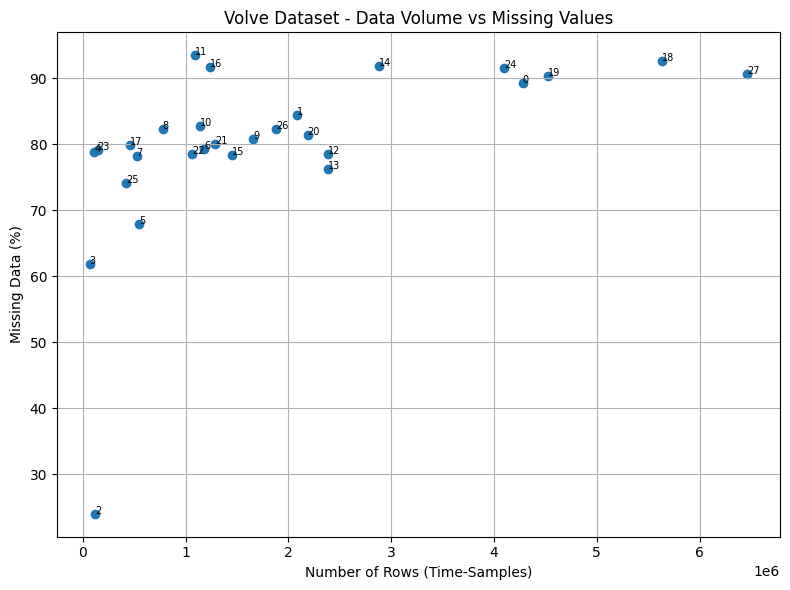

In [5]:
info = info.reset_index(drop=True)

plt.figure(figsize=(8, 6))
plt.scatter(info["rows"], info["missing_pct"])

for i, row in info.iterrows():
    plt.text(row["rows"], row["missing_pct"], str(i), fontsize=7)


plt.xlabel("Number of Rows (Time-Samples)")
plt.ylabel("Missing Data (%)")
plt.title("Volve Dataset - Data Volume vs Missing Values")
plt.grid(True)
plt.tight_layout()
plt.show() 

# Figure: The Percentage of Missing Data for Time-based Samples for Volve Dataset
* x-axis: number of rows, time-samples (in million)
* y-axis: missing percentage
* The Numeric labels : these are the wells index in our dataframe.
### The little number next to each dot is the well index from our data frame
## Interpertation
1. From the chart, the only well with less than 25% mssing data is on the bottom-left with few rows, ~124k
2. Most of the dots/wells are suffuring from 70-90% missing data.
3. For training the model, eigther to go with the far-right top (more rows, and more missing) or bottom-left(less rows and less missing)


In [6]:
#Let view the datafram once more but without the "avg_missing" col
sorted_info = info.sort_values("missing_pct", ascending=True)

sorted_info[["file", "rows", "cols", "missing_pct"]]

,file,rows,cols,missing_pct
2,NA-NA-15_$47$_9-F-5 time.csv,118988,66,23.974203
3,Norway-NA-15_$47$_9-F-1 time.csv,68043,116,61.788590
5,Norway-Statoil-15_$47$_9-F-7 time.csv,547786,135,67.883388
25,Norway-NA-15_$47$_9-F-9 A time.csv,419747,239,74.204576
13,Norway-Statoil-NO 15_$47$_9-F-15 C time.csv,2383786,210,76.221251
7,Norway-Statoil-NO 15_$47$_9-F-4 time.csv,522850,231,78.315045
15,Norway-Statoil-NO 15_$47$_9-F-14 time.csv,1450097,231,78.467903
22,Norway-Statoil-NO 15_$47$_9-F-12 time.csv,1065092,231,78.555601
12,Norway-StatoilHydro-15_$47$_9-F-10 time.csv,2387147,247,78.611457
4,Norway-Statoil-NO 15_$47$_9-F-9 time.csv,113271,231,78.854443


## Notes
1.  We compared these analyses with the orginal work by "Andrej_Volve_Paper", and the results are almost identical, where the missing data for well F-9A is more than 80% within the depth-based file, whereas 74% within the time-based oens.
2. The reason for thes infrequent unsystematic missing data with this dataset according to [Andrej Vovle Paper] are due to uneven recording for different logs from different sensors for different time stamps.

# Picking The Wells for Our PipeLine
### As Any Machine Learning Pipeline, we will need data for the follwoing three phases:

1. Training 
2. Validation
3. Testing

### From The Two Graphs above, we get to the following conclusions:

1. The Best Wells for Our Training are: 
* NA-NA-15_$47$_9-F-5 (Our Primary)
* Norway-NA-15_$47$_9-F-1 (As Our Secondary, after working around solving the missing data issue.)

2. For our Validation and Testing:
* Norway-Statoil-15_$47$_9-F-7
* Norway-NA-15_$47$_9-F-9
* Norway-Statoil-NO 15_$47$_9-F-15 C 

In [7]:
info_sorted

,file,rows,cols,avg_missing,missing_pct
11,Norway-Statoil-NO 15_$47$_9-F-1 C A time.csv,1088288,512,0.935228,93.522832
18,Norway-Statoil-NO 15_$47$_9-F-1 C C time.csv,5638805,636,0.926801,92.680103
14,Norway-Statoil-NO 15_$47$_9-F-1 C 0 time.csv,2883802,467,0.919221,91.922090
16,Norway-Statoil-NO 15_$47$_9-F-11 A time.csv,1233090,474,0.917718,91.771813
24,Norway-Statoil-NO 15_$47$_9-F-11 T2 time.csv,4100405,515,0.915669,91.566924
27,Norway-Statoil-NO 15_$47$_9-F-15 D time.csv,6462926,507,0.906436,90.643635
19,Norway-Statoil-NO 15_$47$_9-F-1 C B time.csv,4528121,512,0.903436,90.343558
0,Norway-Statoil-NO 15_$47$_9-F-11 B time.csv,4278693,481,0.892795,89.279466
1,Norway-Statoil-15_$47$_9-F-12 time.csv,2086733,253,0.844364,84.436365
10,Norway-Statoil-NO 15_$47$_9-F-11 time.csv,1139251,310,0.827773,82.777260


In [8]:
df_2 = pd.read_csv(r"/Users/abdulkhaleqaydin/Projects/university/Master_Journey_Project/_datasets/raw/NA-NA-15_$47$_9-F-5 time.csv")

/var/folders/gl/pl22yqg96dj0r59jq4jrpls80000gn/T/ipykernel_8613/3118688157.py:1: DtypeWarning: Columns (1,2,3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2 = pd.read_csv(r"/Users/abdulkhaleqaydin/Projects/university/Master_Journey_Project/_datasets/raw/NA-NA-15_$47$_9-F-5 time.csv")


In [9]:
print(df_2.columns)

Index(['Unnamed: 0', 'Time Time', 'WBSCALIPERMNEMONIC unitless',
       'WBSBITDEPMNEMONIC unitless', 'WBSTUBULARMNEMONIC unitless',
       'WBSLITHOLOGY4 unitless', 'WBSHOLEDEPMNEMONIC unitless',
       'WBSLITHOLOGY2 unitless', 'WBSTRAJECTORYMNEMONIC unitless',
       'WBSLITHOLOGY1 unitless', 'WBSLITHOLOGY5 unitless',
       'WBSWBGEOMETRYMNEMONIC unitless', 'WBSLITHOLOGY3 unitless',
       'nameWellbore', 'name', 'Time s', 'Cement pump pressure (avg) kPa',
       'Tank 5 volume m3', 'Active Tank Volume m3',
       'Casing (Choke) Pressure kPa', 'Pump 3 Stroke Rate 1/min',
       'Tank volume (total) m3', 'Pump 1 Stroke Rate 1/min', 'Gas %',
       'Bit Depth (MD) m', 'Tank 12 volume m3', 'Pump 2 Stroke Rate 1/min',
       'Trip tank 1 volume m3', 'Weight on Bit kkgf', 'Tank 9 volume m3',
       'Block Position m', 'Tank 14 volume m3', 'Average Rotary Speed rpm',
       'Average Hookload kkgf', 'Tank 1 volume m3',
       'Fill/gain volume obs. (cum) m3', 'Running speed-up (max) m/s'

In [10]:
df_2 = pd.read_csv("/Users/abdulkhaleqaydin/Projects/university/Master_Journey_Project/_datasets/raw/NA-NA-15_$47$_9-F-5 time.csv")

if "TIME" in df_2.columns:
    df_2 = df_2.drop(columns=["TIME"])

/var/folders/gl/pl22yqg96dj0r59jq4jrpls80000gn/T/ipykernel_8613/3363758718.py:1: DtypeWarning: Columns (1,2,3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2 = pd.read_csv("/Users/abdulkhaleqaydin/Projects/university/Master_Journey_Project/_datasets/raw/NA-NA-15_$47$_9-F-5 time.csv")


In [11]:
#We want to know the date of our wells, the start and the end. Becasue, not all the 
# wells are drilled and operated in the same date,lets discover that. 
t = pd.to_datetime(df_2["Time Time"], errors="coerce")

start = t.min()
end = t.max()

print("Data starts at : ", start, " (year = ", start.year, ")")
print("Data ends at :", end, " (year = ", end.year, ")")

Data starts at :  2015-09-22 12:18:13.899000+00:00  (year =  2015 )
Data ends at : 2015-09-22 12:21:35.938000+00:00  (year =  2015 )


In [12]:
#Lets explore the columns which has "time" term with its title
for col_inx, col_name in enumerate(df_2.columns):
    if "time" in col_name.lower():
        print(col_inx, "--->>", col_name)

1 --->> Time Time
15 --->> Time s
65 --->> DateTime parsed


In [13]:
#Lets explore its starting and ending dates
time_cols = ["Time Time", "Time s", "DateTime parsed"]

for col_name in time_cols:
    print(f"\n======={col_name} ======")
    s = df_2[col_name]

    #if it's text, try to parse them as datetime:
    if s.dtype == "object":
        s = pd.to_datetime(s, errors="coerce")

    print("dtype: ", s.dtype)
    print("min: ", s.min())
    print("max: ", s.max())


=======Time Time ======
dtype:  datetime64[ns, UTC]
min:  2015-09-22 12:18:13.899000+00:00
max:  2015-09-22 12:21:35.938000+00:00

=======Time s ======
dtype:  datetime64[ns, UTC]
min:  2007-12-17 05:10:35.040000+00:00
max:  2007-12-20 15:34:35.011000+00:00

=======DateTime parsed ======
dtype:  datetime64[ns, UTC]
min:  2007-12-17 05:10:35.040000+00:00
max:  2007-12-20 15:34:35.011000+00:00


## let the same above experiment for these wells as well:
1. Norway-NA-15_$47$_9-F-1 
2. Norway-Statoil-15_$47$_9-F-7

### Time Time => Raw Timestamps from original WITSML raw data
### DateTime parsed => same as above, but converted to proper dataformat.
### Time s => elapsed times in seconds. for some calculaions, i.e derviatives

In [14]:
#Lets explorer the satrt and end of two other wells as well
base_path = Path("/Users/abdulkhaleqaydin/Projects/university/Master_Journey_Project/_datasets/raw")
files = [
    "Norway-NA-15_$47$_9-F-1 time.csv",
    "Norway-Statoil-15_$47$_9-F-7 time.csv",
]

time_cols = ["Time Time", "Time s", "DateTime parsed"]

for filename in files:
    print("\n" + "=" * 80)
    print(f"Well file: {filename}")
    
    df_3 = pd.read_csv(base_path / filename)

    for col_name in time_cols:
        print(f"\n======={col_name} ======")
        s = df_3[col_name]

        if s.dtype == "object":
            s = pd.to_datetime(s, errors="coerce")

        print("dtype: ", s.dtype)
        print("min: ", s.min())
        print("max: ", s.max())


Well file: Norway-NA-15_$47$_9-F-1 time.csv


/var/folders/gl/pl22yqg96dj0r59jq4jrpls80000gn/T/ipykernel_8613/3084684481.py:14: DtypeWarning: Columns (1,4,8,9,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df_3 = pd.read_csv(base_path / filename)



=======Time Time ======
dtype:  datetime64[ns, UTC]
min:  2015-09-22 12:18:13.899000+00:00
max:  2015-09-22 12:21:35.938000+00:00

=======Time s ======
dtype:  datetime64[ns, UTC]
min:  2007-11-30 18:06:18.029000+00:00
max:  2007-12-04 01:58:12+00:00

=======DateTime parsed ======
dtype:  datetime64[ns, UTC]
min:  2007-11-30 18:06:18.029000+00:00
max:  2007-12-04 01:58:08.026000+00:00

Well file: Norway-Statoil-15_$47$_9-F-7 time.csv


/var/folders/gl/pl22yqg96dj0r59jq4jrpls80000gn/T/ipykernel_8613/3084684481.py:14: DtypeWarning: Columns (39,82,85,90,92,109,119) have mixed types. Specify dtype option on import or set low_memory=False.
  df_3 = pd.read_csv(base_path / filename)



=======Time Time ======
dtype:  datetime64[ns, UTC]
min:  2015-09-22 12:18:13.899000+00:00
max:  2015-09-22 12:21:35.938000+00:00

=======Time s ======
dtype:  datetime64[ns, UTC]
min:  2007-09-15 08:36:59.040000+00:00
max:  2007-10-13 00:41:56.026000+00:00

=======DateTime parsed ======
dtype:  datetime64[ns, UTC]
min:  2007-09-15 08:36:59.040000+00:00
max:  2007-10-13 00:41:56.026000+00:00


In [15]:
df_2[["Time Time", "Time s", "DateTime parsed"]].dtypes

Time Time          object
Time s             object
DateTime parsed    object
dtype: object

In [16]:
# Lets see the first 5 rows for each one of these columns
print(df_2[["Time Time", "DateTime parsed", "Time s"]].head())

                  Time Time                   DateTime parsed  \
0  2015-09-22T12:18:13.899Z                               NaN   
1  2015-09-22T12:21:35.938Z                               NaN   
2  2015-09-22T12:18:13.899Z                               NaN   
3  2015-09-22T12:21:35.938Z                               NaN   
4                       NaN  2007-12-17 05:10:35.040000+00:00   

                     Time s  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4  2007-12-17T05:10:35.040Z  


## Interesting! It looks like we have two different recorded time blocks here ! One for 2015 and another for 2007!!

In [17]:
# lets create a clean time column where it will host "DateTime parsed" column after it get converted from object into 
# datetime format
df_2["TIME"] = pd.to_datetime(df_2["DateTime parsed"], errors="coerce")

In [18]:
# Since we only need our new time column "TIME", lets drop the other time related columns
df_2 = df_2.drop(columns=["Time Time", "Time s", "DateTime parsed"])

In [19]:
df_2["TIME"].dtype

datetime64[ns, UTC]

In [20]:
def read_with_time(path):
    """ 
    Read a Volve time.csv file abd create a unified TIME column across all given files.
    """
    df = pd.read_csv(path)

    # just a sanity check in case "DateTime parsed" is not the file
    if "DateTime parsed" not in df.columns:
        raise ValueError("Expected 'DateTime parsed' column but did not find it.")
    
    #convert to datetime type
    df["TIME"] = pd.to_datetime(df["DateTime parsed"], utc=True, errors="coerce")


    #drop the other time related columns namely "Time Time", "Time s", "DateTime parsed"
    for col in ["Time Time", "Time s", "DateTime parsed"]:
        if col in df.columns:
            df = df.drop(columns=[col])

    return df

### Since, we have selected the wells for training, validation and testing, we
### need to check key features that we need for our pipeline which are:
1. Torque.
2. Hookload.
3. RPM.
4. SPP.
5. Flow-In
6. Flow-Out
7. Pit-Volume
8. Block Position
9. Bit Depth
10. Hole Depth

### before any step, we need to also check that :
1. If the well has all the features that already mentioned above.
2. We need the percentage of NaN for each feature from above.
3. We'll need to plot these fteaures and the if they were align with comon petroleum engineering norms, we don't want something out of mind !

### again, our wells will be
1. The Best Wells for Our Training are: 
* NA-NA-15_$47$_9-F-5 (Our Primary)
* Norway-NA-15_$47$_9-F-1 (As Our Secondary, after working around solving the missing data issue.)

2. For our Validation and Testing:
* Norway-Statoil-15_$47$_9-F-7
* Norway-NA-15_$47$_9-F-9
* Norway-Statoil-NO 15_$47$_9-F-15 C 

In [21]:
## Checking the features existince and naming across the five wells 

def map_logical_features(df):
    lower_cols = {c.lower(): c for c in df.columns}

    feature_keywords = {
        "torque":      ["torque"],
        "hookload":    ["hookload", "hook load", "hook"],
        "rpm":         ["rpm", "rotary speed"],
        "spp":         ["standpipe pressure", "spp"],
        "flow_in":     ["flow in", "in flow", "flow-in", "flow in m3", "inlet flow"],
        "flow_out":    ["flow out", "out flow", "flow-out", "flow out m3", "return flow"],
        "pit_volume":  ["pit volume", "mudpit volume"],
        "block_pos":   ["block position", "block/topdrive position"],
        "bit_depth":   ["bit depth"],
        "hole_depth":  ["hole depth", "hole depth (tvd)", "hole depth tvd"],
    }

    mapping = {}
    for feat, keywords in feature_keywords.items():   # 'for' = loop reserved keyword
        found = []
        for lc_name, orig_name in lower_cols.items():
            for kw in keywords:
                if kw in lc_name:                     # 'if' = conditional reserved keyword
                    found.append(orig_name)
                    break
        mapping[feat] = found
    return mapping

# ---- Apply to your target wells ----

base = "/Users/abdulkhaleqaydin/Projects/university/Master_Journey_Project/_datasets/raw"

target_files = {
    "F5_NA"   : os.path.join(base, "NA-NA-15_$47$_9-F-5 time.csv"),
    "F1_NA"   : os.path.join(base, "Norway-NA-15_$47$_9-F-1 time.csv"),
    "F7_Statoil": os.path.join(base, "Norway-Statoil-15_$47$_9-F-7 time.csv"),
    "F9A_NA"  : os.path.join(base, "Norway-NA-15_$47$_9-F-9 A time.csv"),
    "F15C_Statoil": os.path.join(base, "Norway-Statoil-NO 15_$47$_9-F-15 C time.csv"),
}

well_maps = {}

for well_id, path in target_files.items():
    print(f"\n=== {well_id} ===")
    df = pd.read_csv(path, nrows=1)   # headers only, fast
    fm = map_logical_features(df)
    well_maps[well_id] = fm
    print(fm)


=== F5_NA ===
{'torque': ['Average Surface Torque kN.m'], 'hookload': ['Average Hookload kkgf'], 'rpm': ['Average Rotary Speed rpm', 'Bit RPM rpm'], 'spp': ['Average Standpipe Pressure kPa'], 'flow_in': ['Mud Flow In L/min'], 'flow_out': ['Mud Flow Out % %'], 'pit_volume': [], 'block_pos': ['Block Position m'], 'bit_depth': ['Bit Depth (MD) m'], 'hole_depth': ['Hole Depth (TVD) m', 'Hole depth (MD) m']}

=== F1_NA ===
{'torque': ['Average Surface Torque kN.m'], 'hookload': ['Average Hookload kkgf'], 'rpm': ['MWD Turbine RPM ', 'Average Rotary Speed rpm'], 'spp': ['Average Standpipe Pressure kPa'], 'flow_in': ['Mud Flow In L/min'], 'flow_out': ['Mud Flow Out % %'], 'pit_volume': [], 'block_pos': ['Block Position m'], 'bit_depth': ['Bit Depth (TVD) ', 'Bit Depth (MD) m'], 'hole_depth': ['Hole depth (MD) m', 'Hole Depth (TVD) m']}

=== F7_Statoil ===
{'torque': ['Average Surface Torque kN.m', 'Maximum Surface Torque '], 'hookload': ['Average Hookload kkgf', 'Maximum Hookload '], 'rpm': [

## Interpertations
### 1. Torque
### all the wells are flowing the same naming pattern which is (Average Surface Torque kN.m ) except well F15C_Statoil which name it as "Surface Torque Average N.m". 

### 2. Hockload 
### all have the same naming which is (Average Hookload kkgf ) except F15C with (Hookload N, Hookload N.1, Hookload N.2)

### 3. RPM 
### all have the same naming pattern (Average Rotary Speed rpm) except F15C with no (Average Rotary Speed rpm) but it has (Surface RPM c/s, Bit RPM - Total RPM c/s)


### 4. Standpip Pressure SPP
### All the four wells hav e"Average Standpipe Pressure kPa, whereas for F15C, the SPP is missing.

### 5. Flow in 
### in the four wells, there is Mud Flow In L/min, whereas in F15C the "Mud Flow In " is in m3/s, with "Cementing Flows"

### 6. Flow Out 
### In wells (F5, F1, and F7) there is "Mud Flow Out %", but in F9A, the "Flow Out" coloum is empty! Finally, in well F15C, there are several volumetric curves regarding "Flow-Out"BUT in "m3/s".

### 7. Pit Volume
### For wells (F5, F1, F7), no "Pit Volume" column has been found !! but for well F9A, there are lots of "MudPit Volume Average in m3". Finally, for well F15C, supprisngly, this feature exists with even "Toltal Pit Volume " but in "m3"!

### 8. Block Position
### All wells hav e "BLock Position" in "m", except F15C which has different naming which is (Block/Topdrive Position).

### 9. Bit depth
### All the four wells have the "bit depth", as follow:
1. F5 => Bit Depth (MD) m 
2. F1 => Bit Depth (TVD)  and Bit Depth (MD) m
3. F7 => Bit Depth, Bit Depth (MD) m, Bit Depth (TVD)
4. F15C => Bit Depth (MD) m, Bit Depth m, Bit Depth m.1
### BUT, for well f15C, again, no. "Bit Depth" column !

### 10 Hole Depth
### All the four wells have ( Hole depth (MD) m and/or Hole Depth (TVD) m) whereas for well F15C (ole Depth m + The mnemonic of the Hole depth m).


### Summary:
### For wells F5, F1, F7, and F9A => the naming is very consistent for the vital drilling features that we need for our pipeline. The ONLY outlier is F15C_Statoil which has the following flaws:
1. SPP
2. Bit-Depth
3. Torque, Hook, RPM, and Flows are Exists BUT with Different naming pattern and different units.

Givin all the above, we're goign to drop well (F15C_Statoil) for NOW, and focus to the other for wells for our pipeline whereas we're going to use different wells later on for out "Test Phase" After ""we Check the consistency of the features with the core drilling channels that we need for the Models for Our PipeLine"". 

In [22]:
# thsi code is to create an html and markdown table for the step (## Checking the features existince and naming across the five wells 
# ) better visualisation of the feature mapping across the wells
# so we can put it in our these. 

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Lets put the perviouse cell output into a more readable format
tb_df = pd.DataFrame.from_dict(well_maps, orient="index").T 

# turn each list into single cell string
tb_df = tb_df.applymap(lambda xs: "-" if not xs else "; ".join(xs))


#order the features so it doesn't messed up when you switch between wells
ordered_features = [
    "torque",
    "hookload",
    "rpm",
    "spp",
    "flow_in",
    "flow_out",
    "pit_volume",
    "block_pos",
    "bit_depth",
    "hole_depth",
]
tb_df = tb_df.reindex(ordered_features)

# Counts table
counts_df = (
    pd.DataFrame.from_dict(well_maps, orient="index")
    .T
    .applymap(lambda xs: 0 if not xs else len(xs))
    .reindex(ordered_features)
)

# Export
tb_df.to_html("features_mapping.html", index=True)

markdown_table = tb_df.to_markdown(index=True)
counts_markdown = counts_df.to_markdown(index=True)

print("*** Features Mapping Table (Markdown) ***")
print(markdown_table)
print("\n*** Features Counts Table (Markdown) ***")
print(counts_markdown)


*** Features Mapping Table (Markdown) ***
|            | F5_NA                                 | F1_NA                                      | F7_Statoil                                                                                       | F9A_NA                                                                                                                                                                                                                                                                                                                                                                       | F15C_Statoil                                                                                                                                                              |
|:-----------|:--------------------------------------|:-------------------------------------------|:-------------------------------------------------------------------------------------------------|:---------------------

# to do
Nan percentage for earch feature in each of these wells 
* F5_NA
* F1_Na
* F7_Statoil
* F9A_NA

In [23]:
# a helper function for well paths
BASE_DATA_PATH = "/Users/abdulkhaleqaydin/Projects/university/Master_Journey_Project/_datasets/raw"

def dataset_path(filename: str) -> str:
    """ 
    Return the full path for a given dataset filename inside the raw dataset.
    Example: dataset_path("Norway-NA-15_$47$_9-F-1 time.csv")    
    """
    return os.path.join(BASE_DATA_PATH, filename)

In [24]:
# # Plotting the features across the wells

# pick the wels we want to plot
# df_f5, df_f1, df_f7, df_f9

WELL_FILES = {
    "F5_NA" : dataset_path("NA-NA-15_$47$_9-F-5 time.csv"),
    "F1_NA": dataset_path("Norway-NA-15_$47$_9-F-1 time.csv"),
    "F7_Statoil": dataset_path("Norway-Statoil-15_$47$_9-F-7 time.csv"),
    "F9A_NA" : dataset_path("Norway-NA-15_$47$_9-F-9 A time.csv"),
}


def get_well_path(well_id: str) -> str:
    """ 
    Given a well ID like "F%_NA", return its corresponding file path.
    """

    if well_id not in WELL_FILES:
        raise KeyError(f"Unkonwn well_id: {well_id}")
    return dataset_path(WELL_FILES[well_id])

def read_well(well_id: str) -> pd.DataFrame:
    """ 
    Helper function: from well_id -> path -> DataFrame with UNMIFIED TIME column.
    """
 
    path = get_well_path(well_id)
    return read_with_time(path)


In [25]:
#pick the wells that we will use in our pipeline
Target_Wells = ["F5_NA", "F1_NA", "F7_Statoil", "F9A_NA"]

# build a dict of cleaned DataFrame, oe per core well
dfs = {
    well_id: read_well(well_id)
    for well_id in Target_Wells
}

#quic sanity check of the loaded dataframes
for well_id, df in dfs.items():
    print(well_id, "TIME dtype:", df["TIME"].dtype, "rows:", len(df))

/var/folders/gl/pl22yqg96dj0r59jq4jrpls80000gn/T/ipykernel_8613/3971608432.py:5: DtypeWarning: Columns (1,2,3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)
/var/folders/gl/pl22yqg96dj0r59jq4jrpls80000gn/T/ipykernel_8613/3971608432.py:5: DtypeWarning: Columns (1,4,8,9,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)
/var/folders/gl/pl22yqg96dj0r59jq4jrpls80000gn/T/ipykernel_8613/3971608432.py:5: DtypeWarning: Columns (39,82,85,90,92,109,119) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)
/var/folders/gl/pl22yqg96dj0r59jq4jrpls80000gn/T/ipykernel_8613/3971608432.py:5: DtypeWarning: Columns (119,146,226,229,232,236) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


F5_NA TIME dtype: datetime64[ns, UTC] rows: 118988
F1_NA TIME dtype: datetime64[ns, UTC] rows: 68043
F7_Statoil TIME dtype: datetime64[ns, UTC] rows: 547786
F9A_NA TIME dtype: datetime64[ns, UTC] rows: 419747


### Till now, we done with selecting the wells, and dealing with time column and converting it to datetime dtype

In [26]:
# Its time to plot our features using TIME column as x-axis

def chartgenerator(searchphrase: str, dfs_dict: dict):
    """ 
    For a given 'searchphrase' e.g ('torque', 'hookload', 'rpm', 'SPP'),
    plot all matching columns for each well in 'dfs_dict', using TIME column as x-axis.
    """

    search = searchphrase.lower()

    # loop over wells and their DataFrames
    for well_id, df in dfs_dict.items():
        print(f"\n*** {well_id} ***")

        # make a copy so we don't modify teh original DataFrame
        df_plot = df.copy()

        # set TIME column as x-axis index and drop the rows where TIME is NaT 'Not a Time'
        df_plot = df_plot.dropna(subset=["TIME"]).set_index("TIME")

        # find matching columns and plot them 
        for col in df_plot.columns:
            if search in col.lower():
                plt.figure(figsize=(12, 4))
                df_plot[col].dropna().plot(
                    linewidth=0.5,
                    label=col,
                    title=f"{well_id} - {col}"
                )

                plt.legend()
                plt.xlabel("TIME")
                plt.ylabel(col)
                plt.tight_layout()
                plt.show()


>>>>>>>> TORQUE <<<<<<<<


*** F5_NA ***


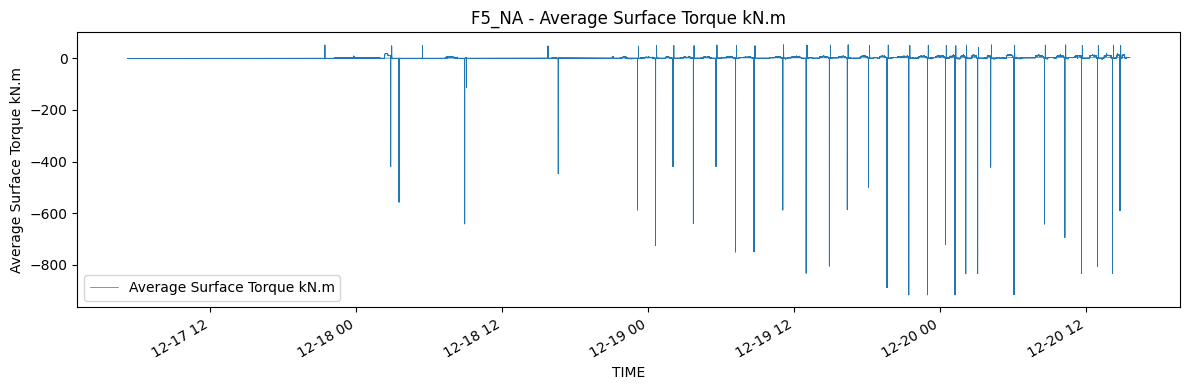


*** F1_NA ***


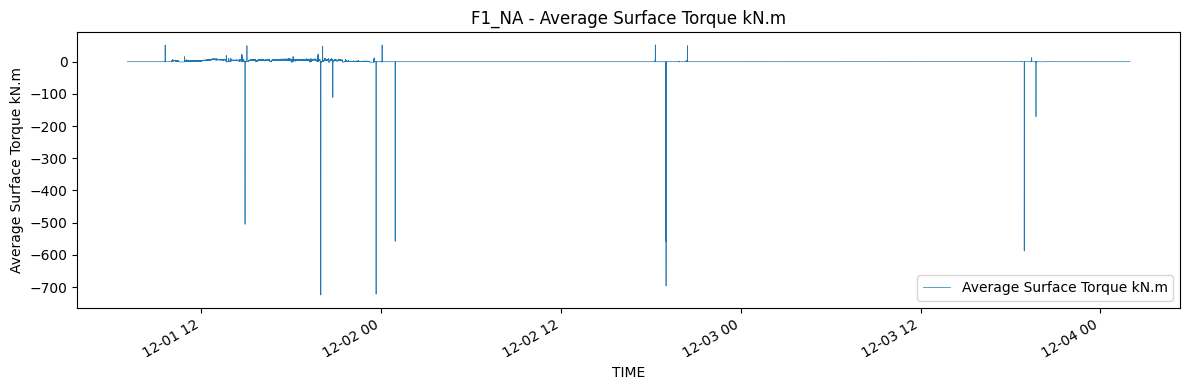


*** F7_Statoil ***


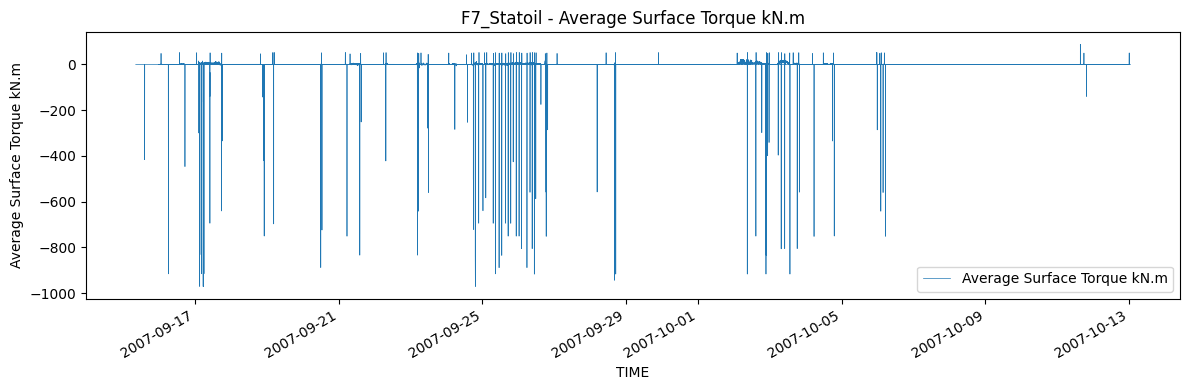

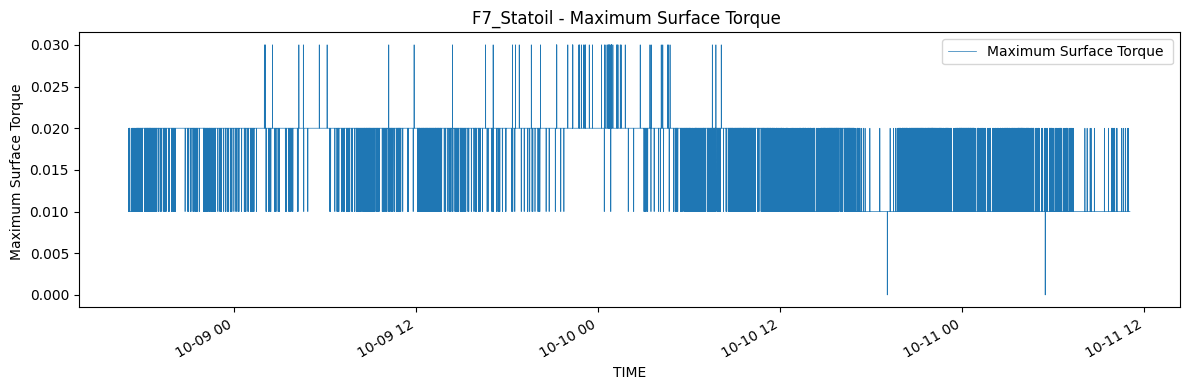


*** F9A_NA ***


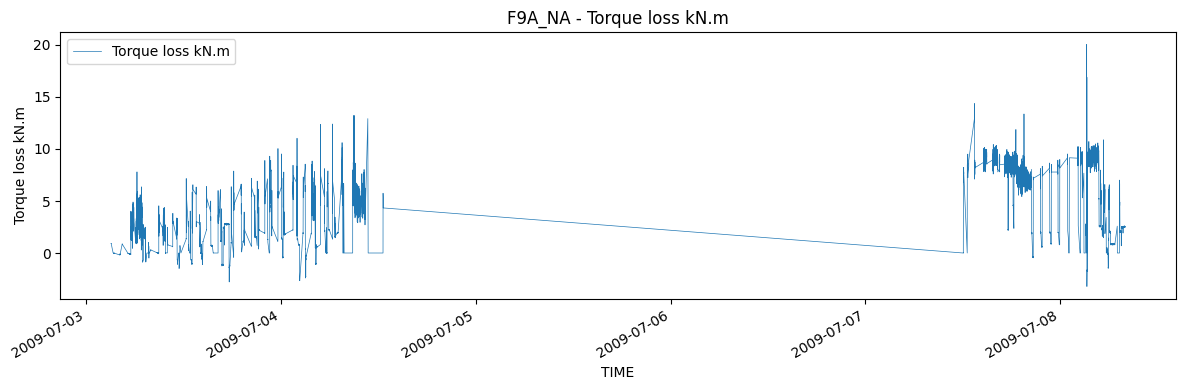

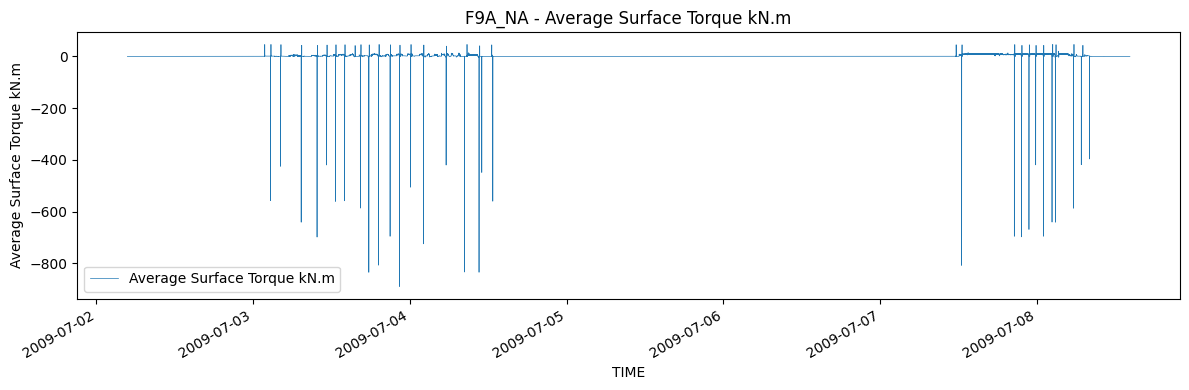


>>>>>>>> HOOKLOAD <<<<<<<<


*** F5_NA ***


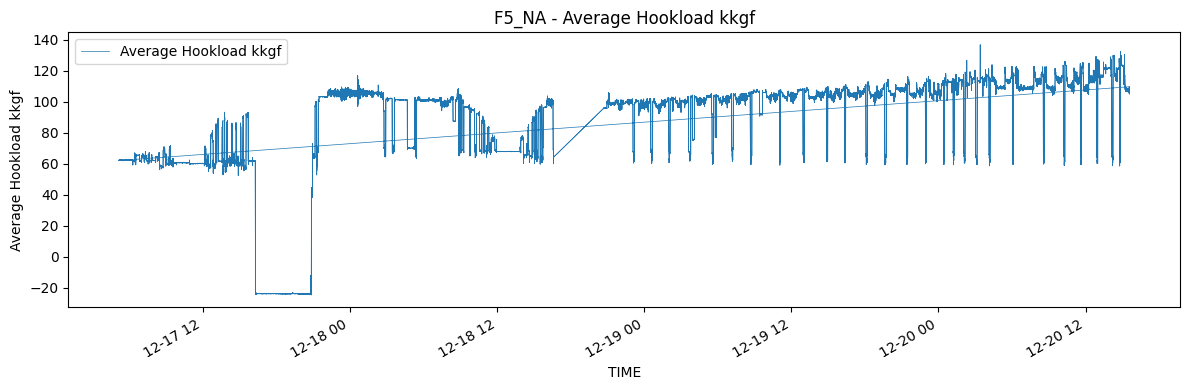


*** F1_NA ***


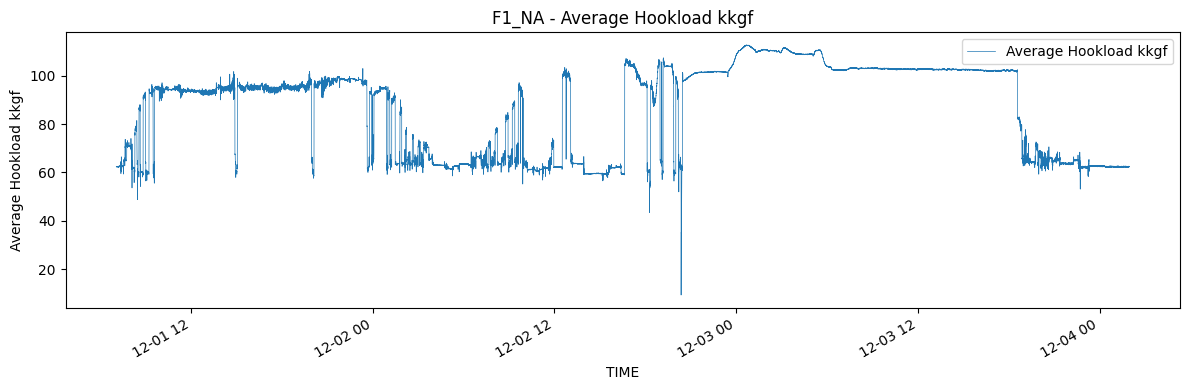


*** F7_Statoil ***


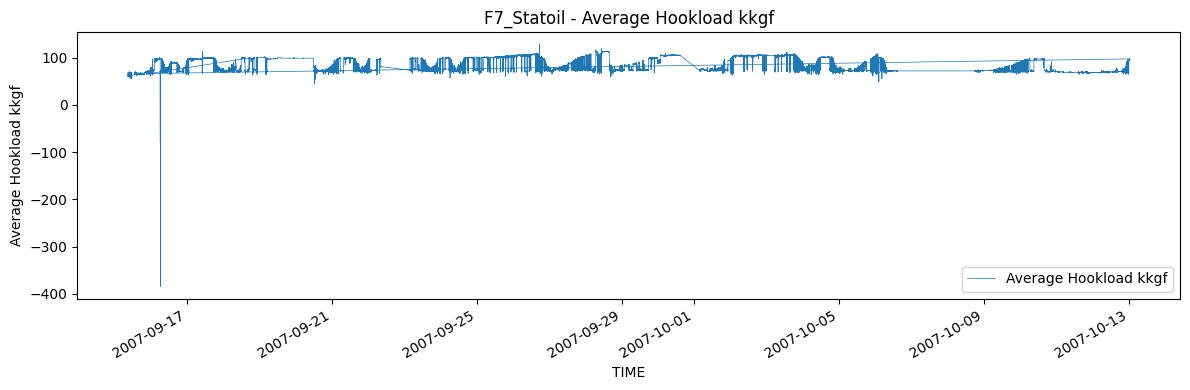

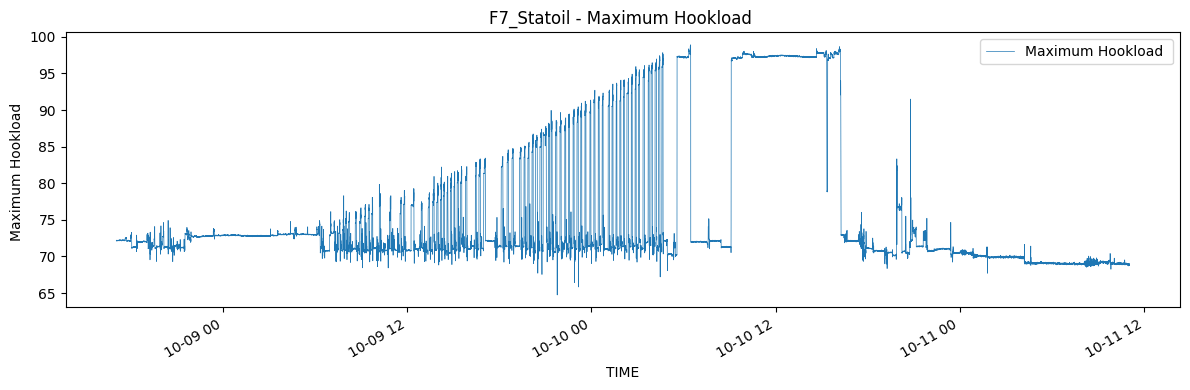


*** F9A_NA ***


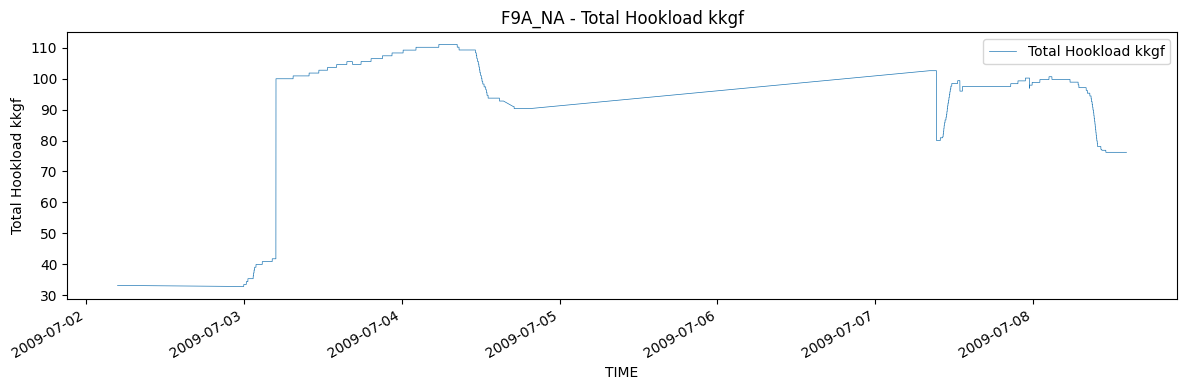

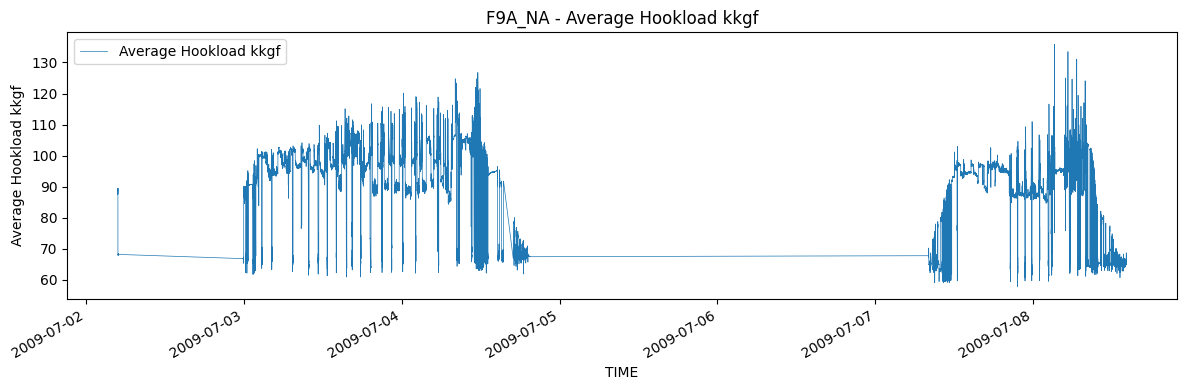

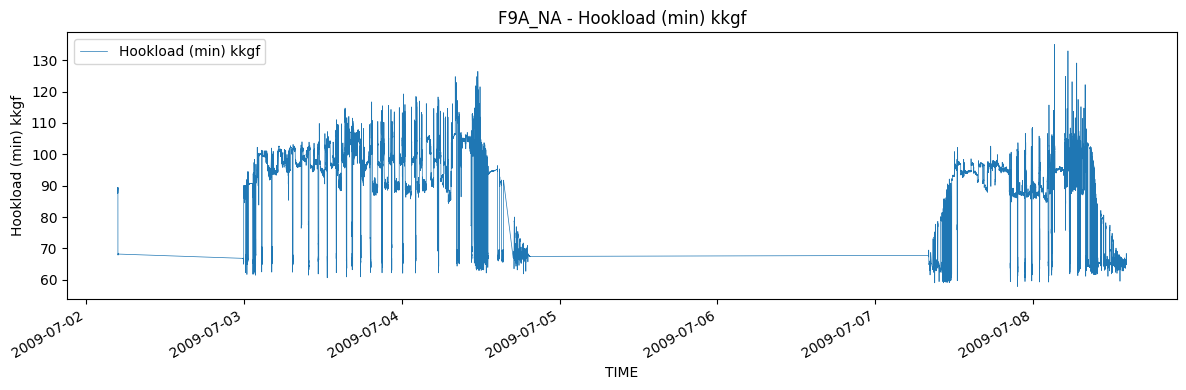

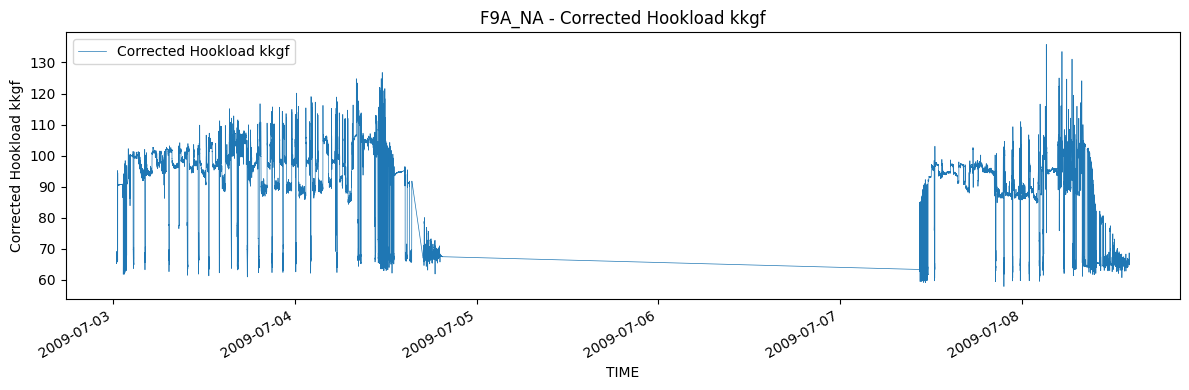

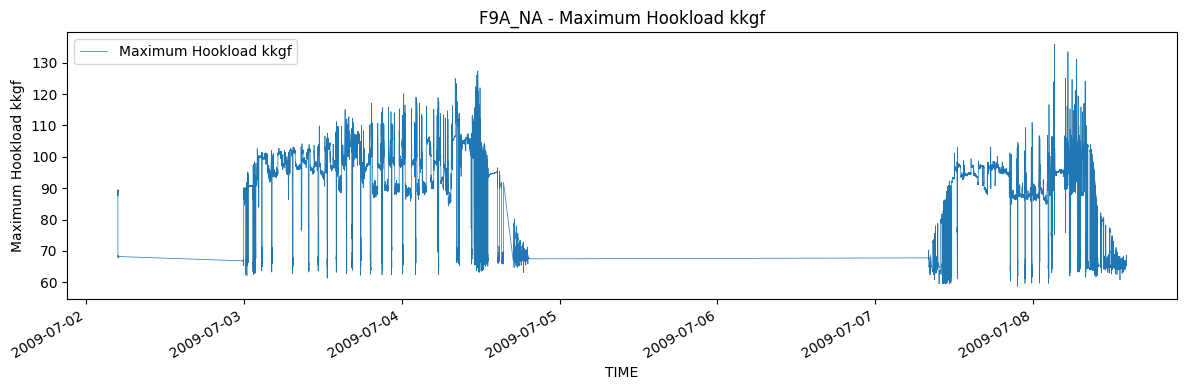

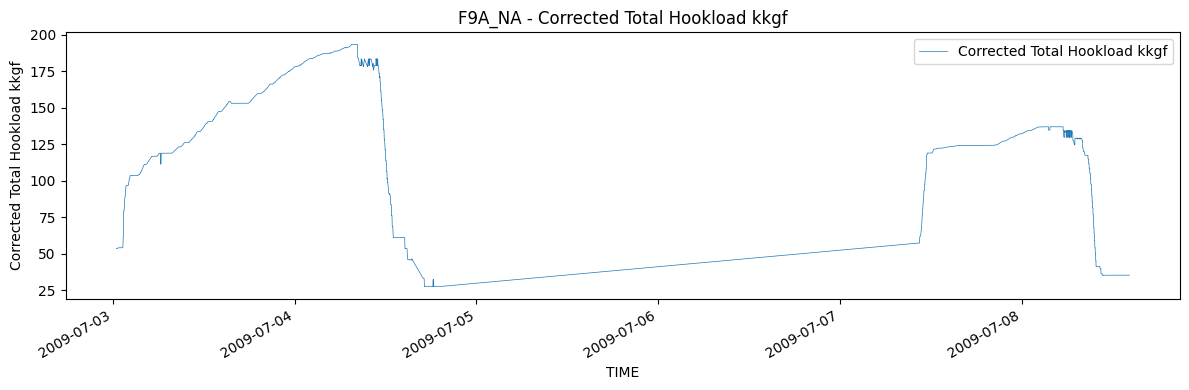


>>>>>>>> RPM <<<<<<<<


*** F5_NA ***


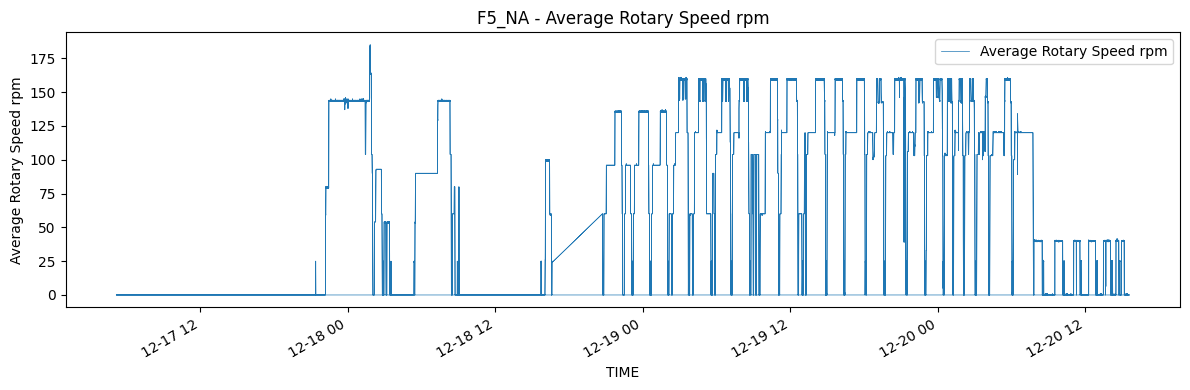

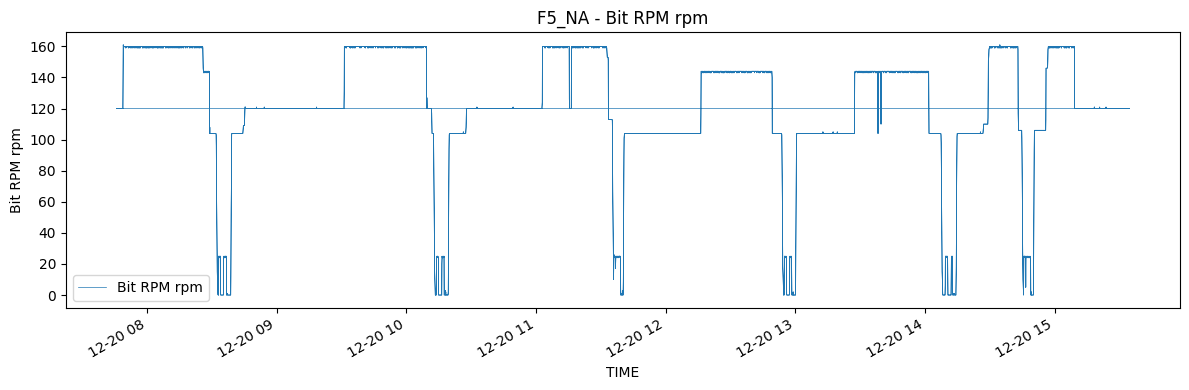


*** F1_NA ***


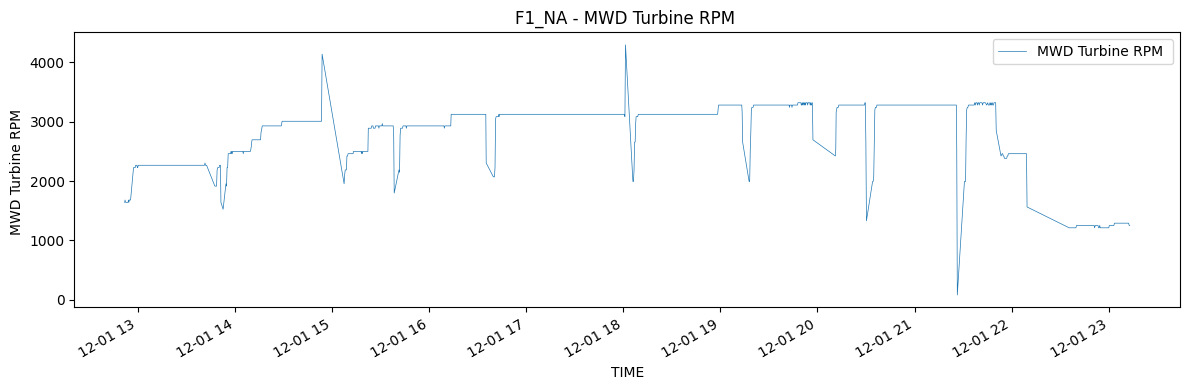

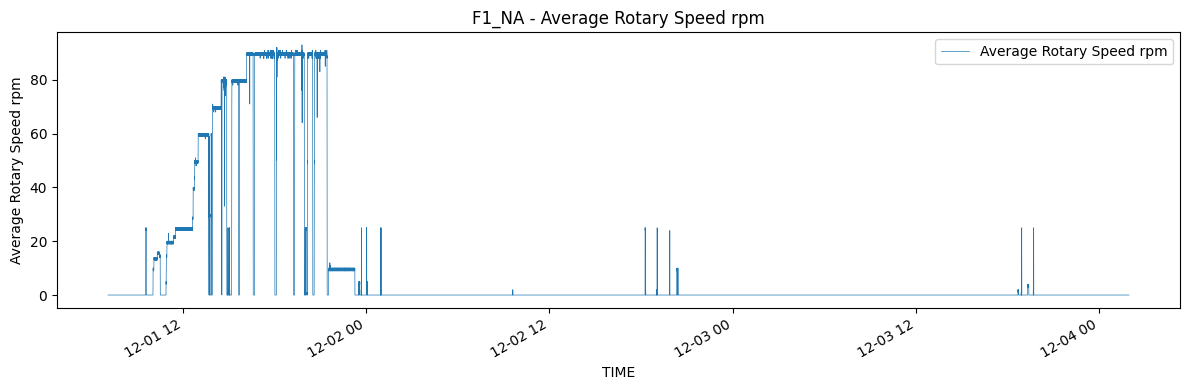


*** F7_Statoil ***


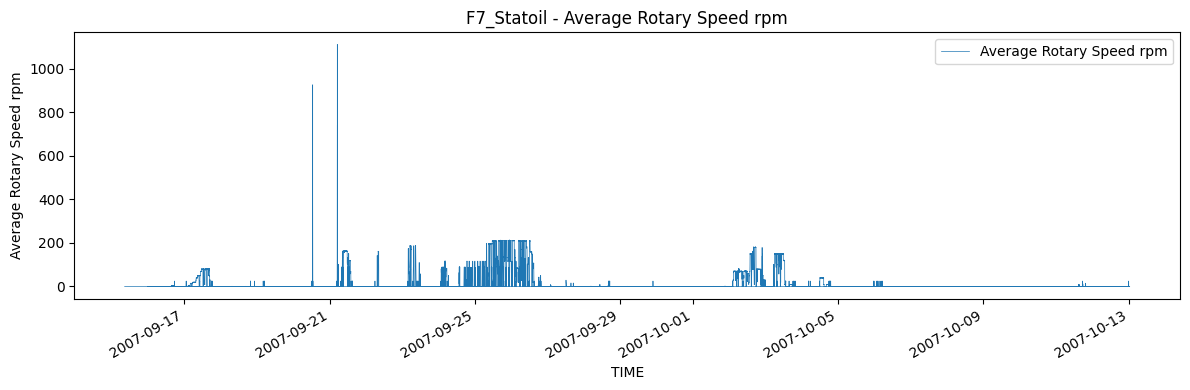

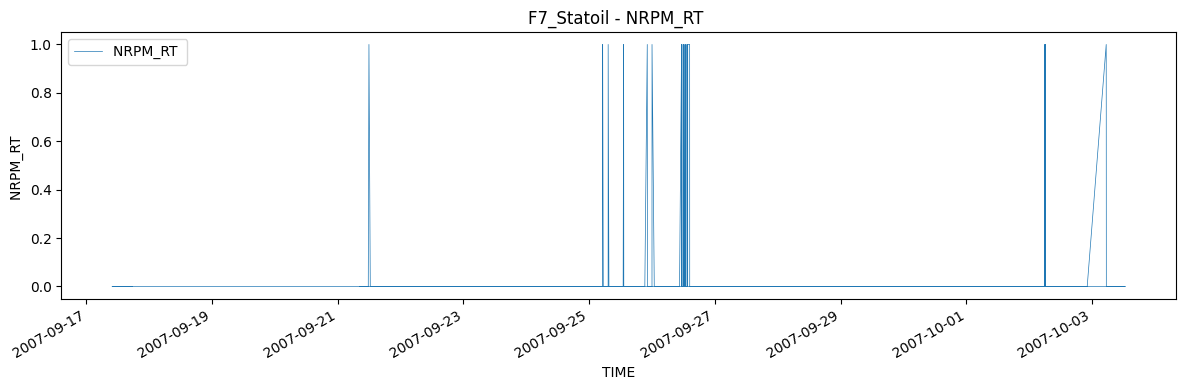

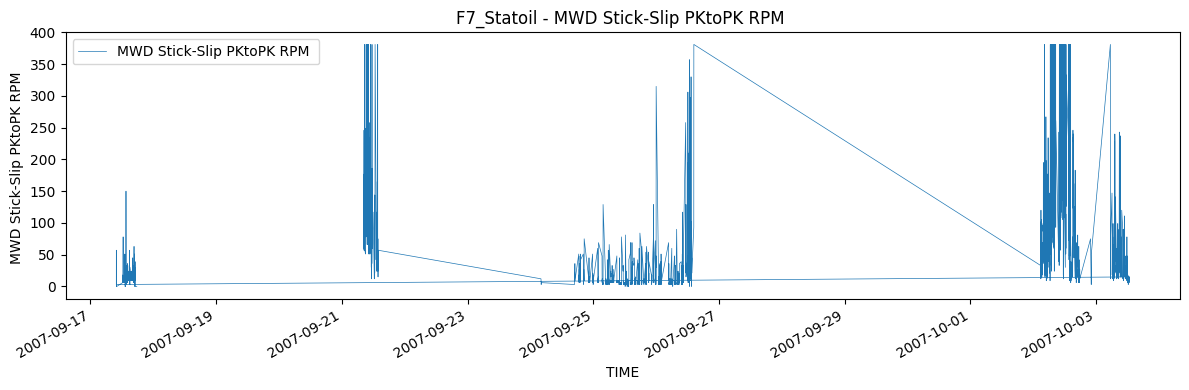

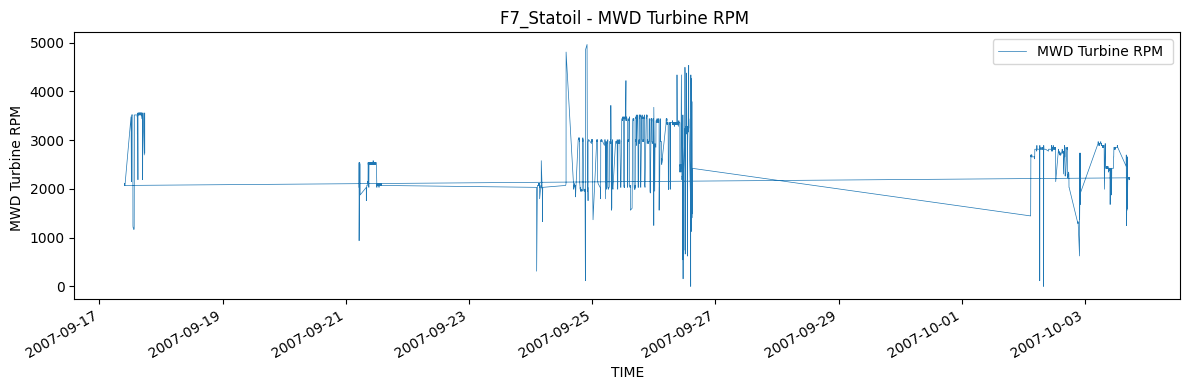

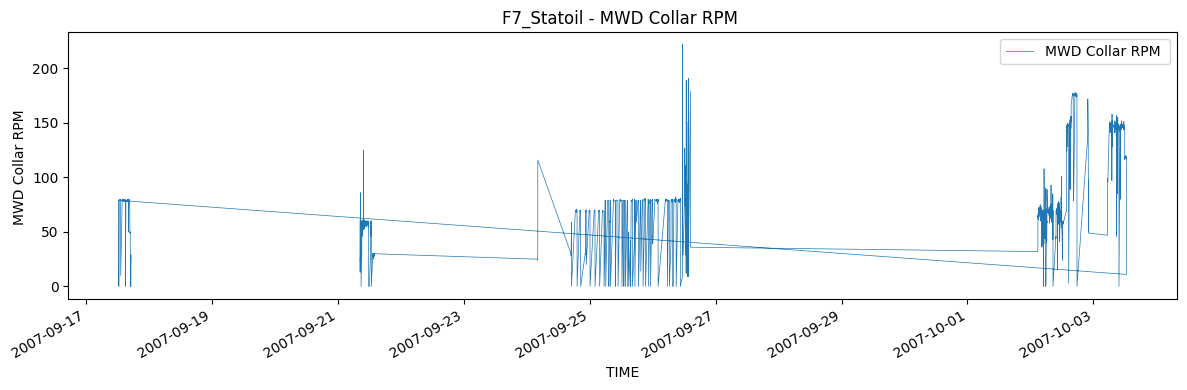


*** F9A_NA ***


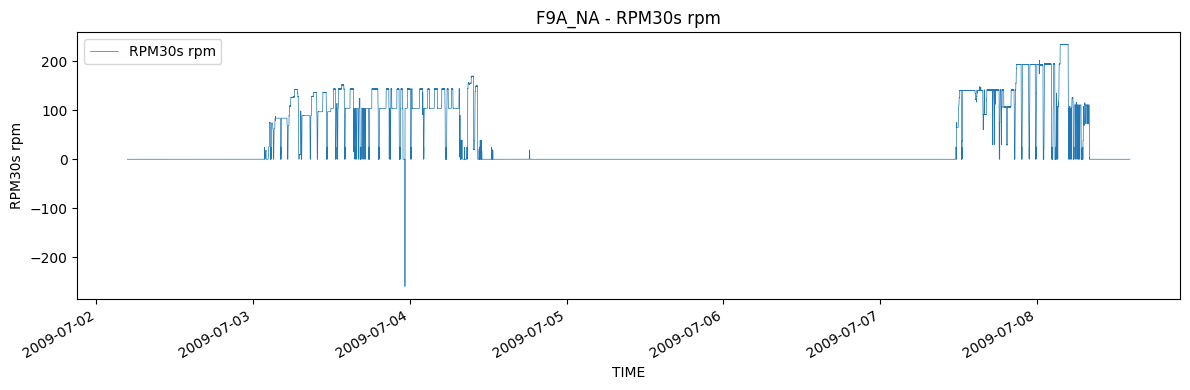

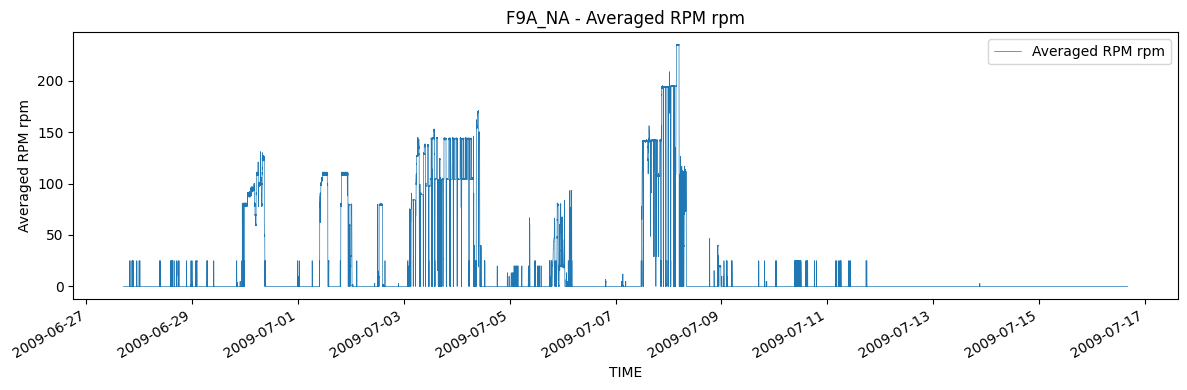

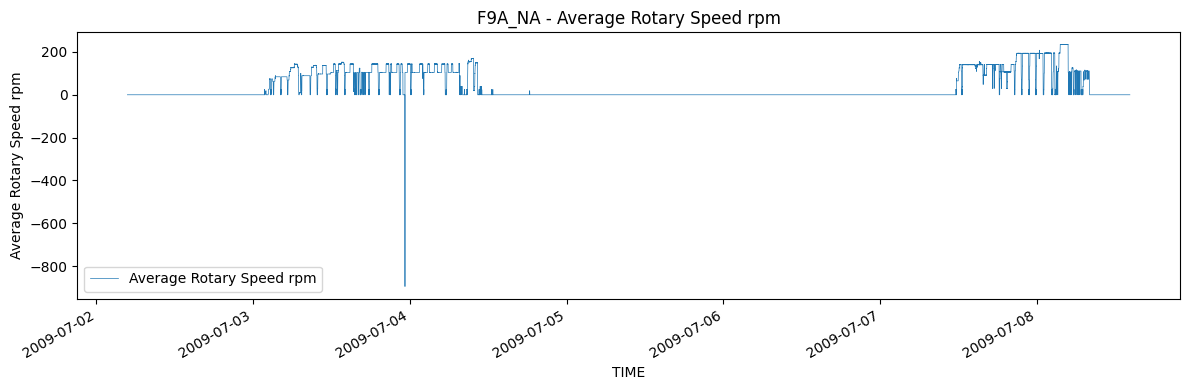

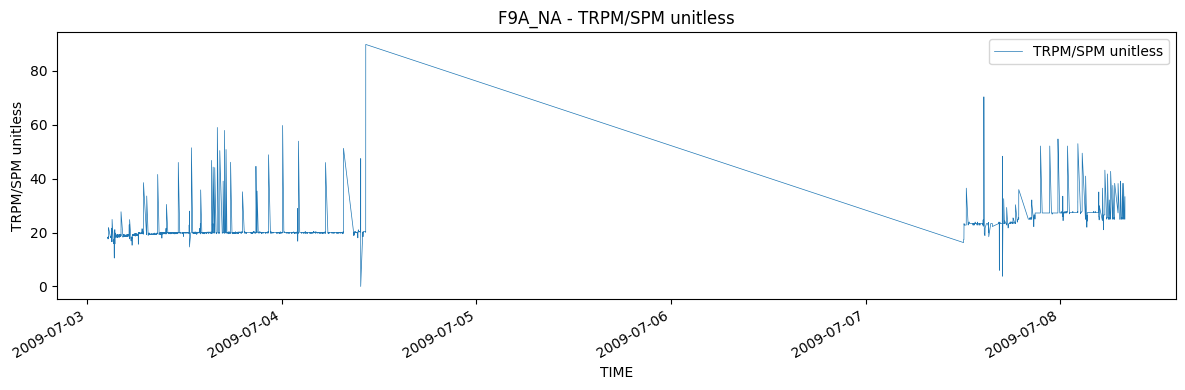

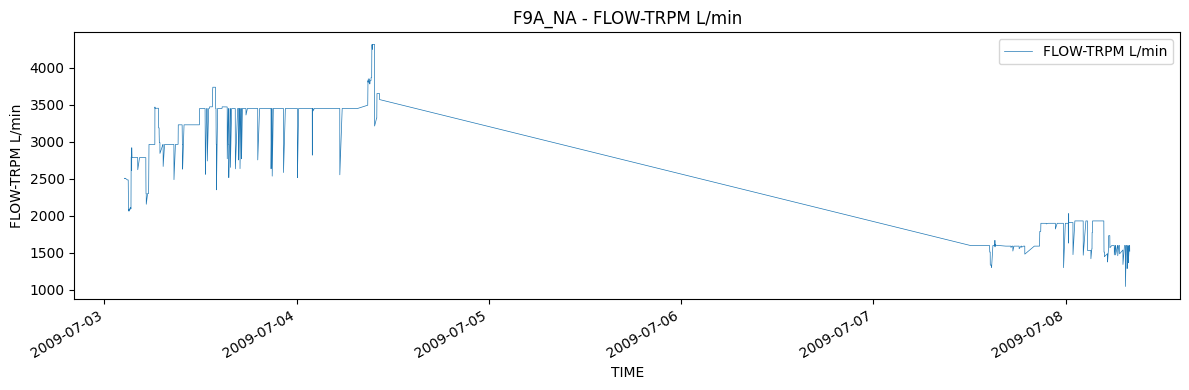

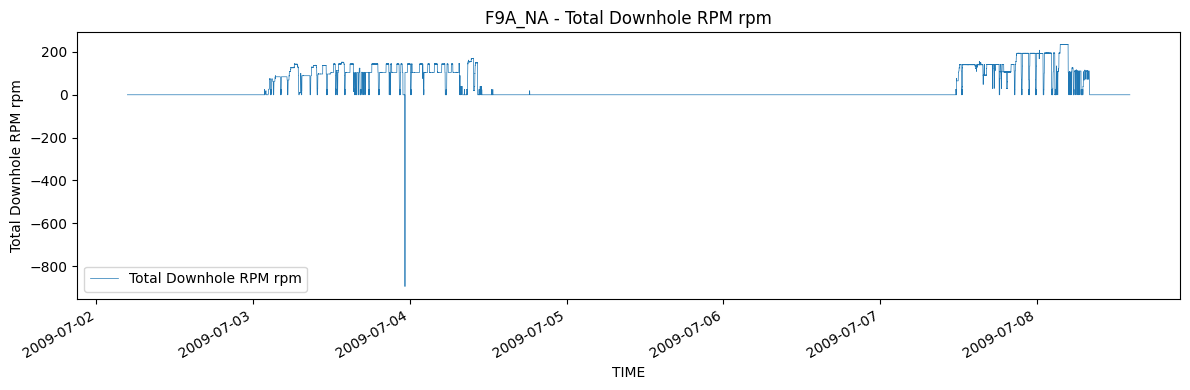

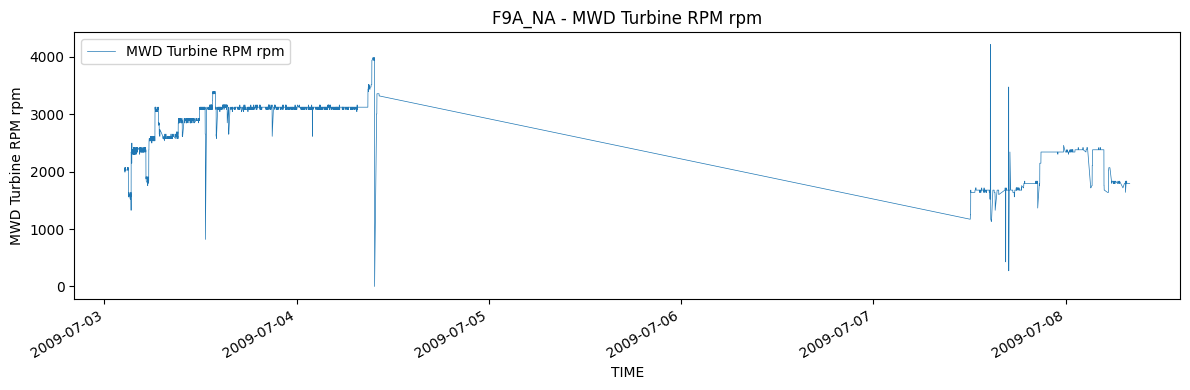

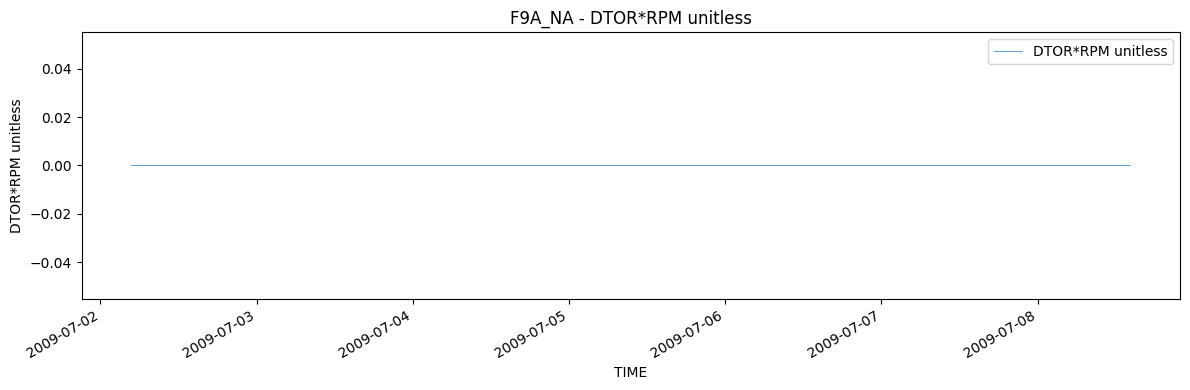

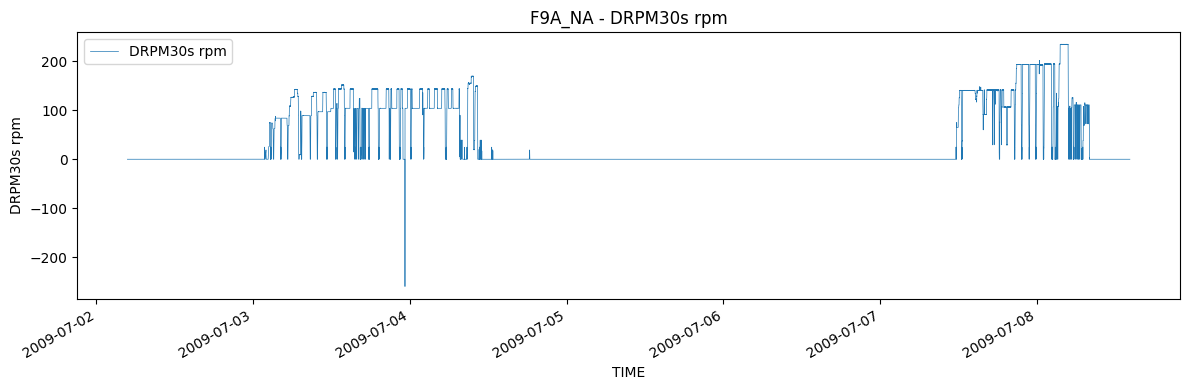

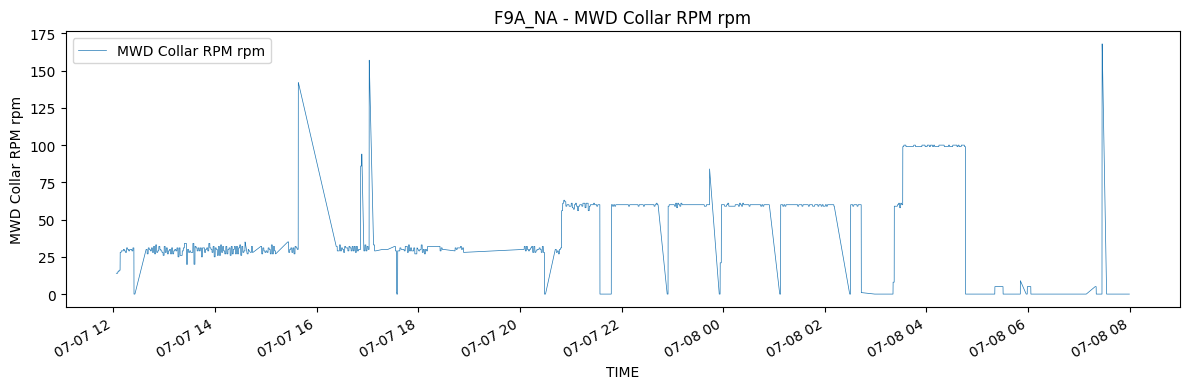

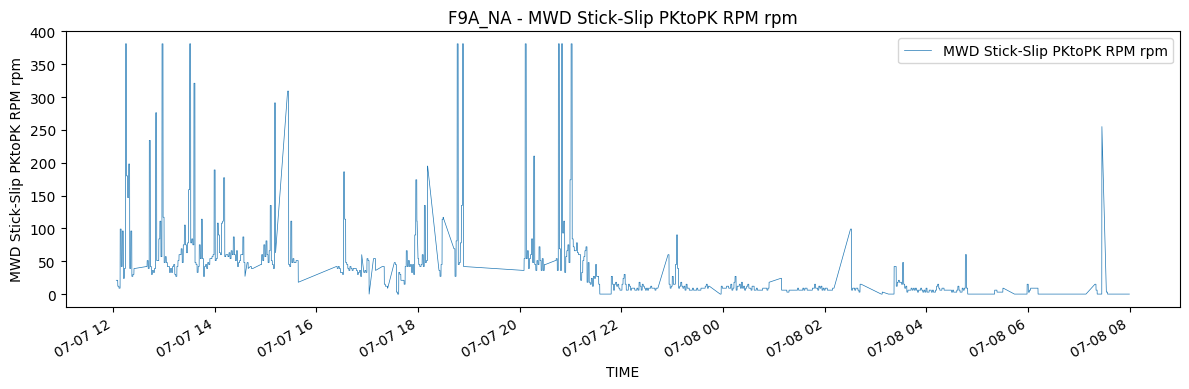


>>>>>>>> SPP <<<<<<<<


*** F5_NA ***


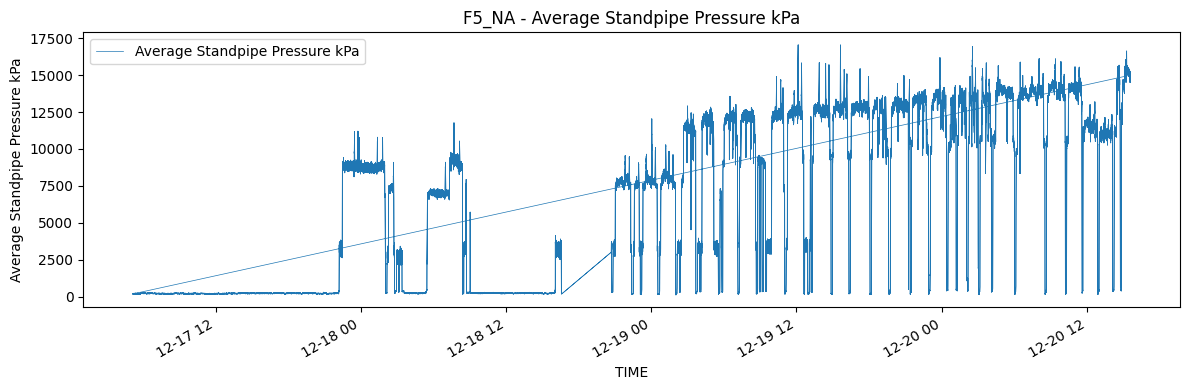


*** F1_NA ***


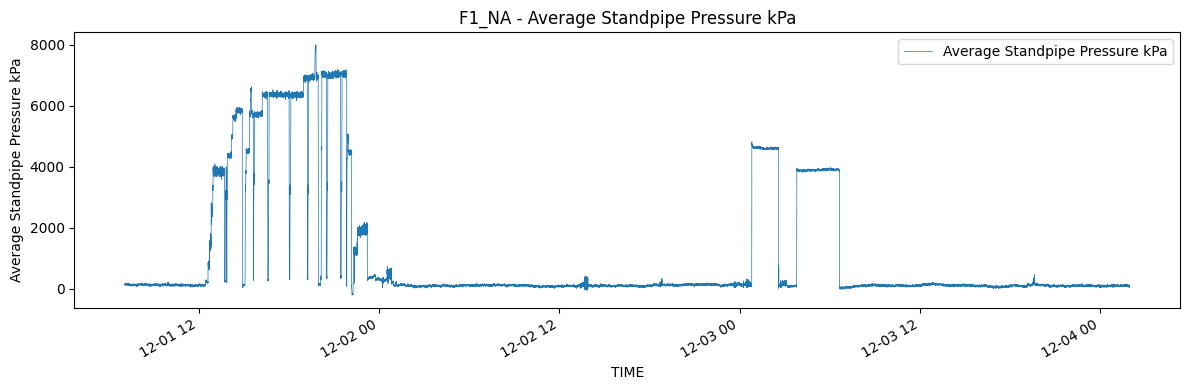


*** F7_Statoil ***


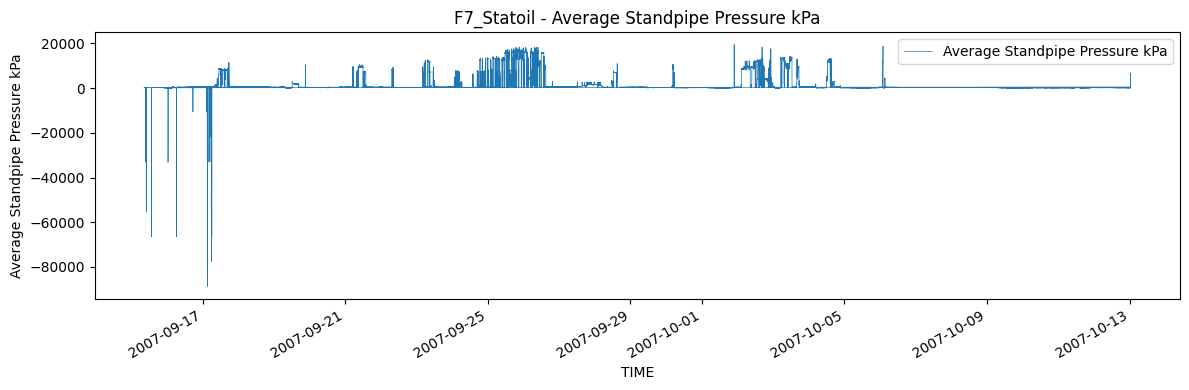


*** F9A_NA ***


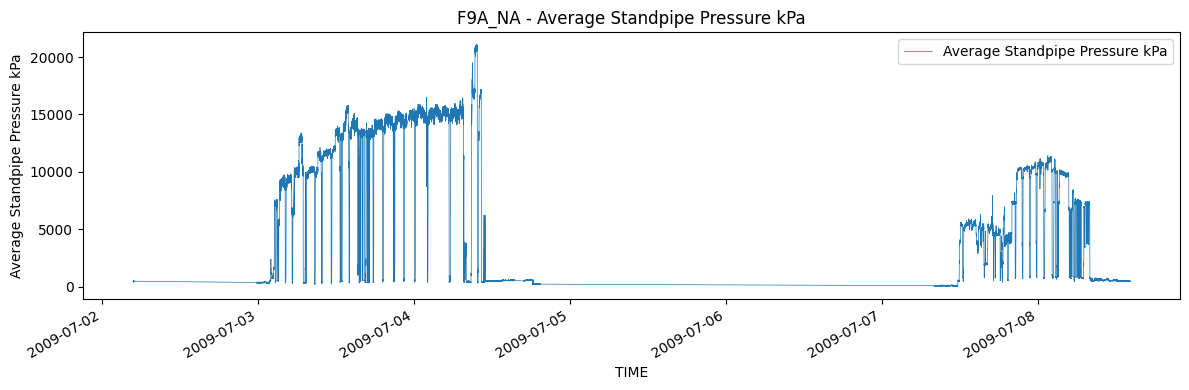


>>>>>>>> FLOW_IN <<<<<<<<


*** F5_NA ***


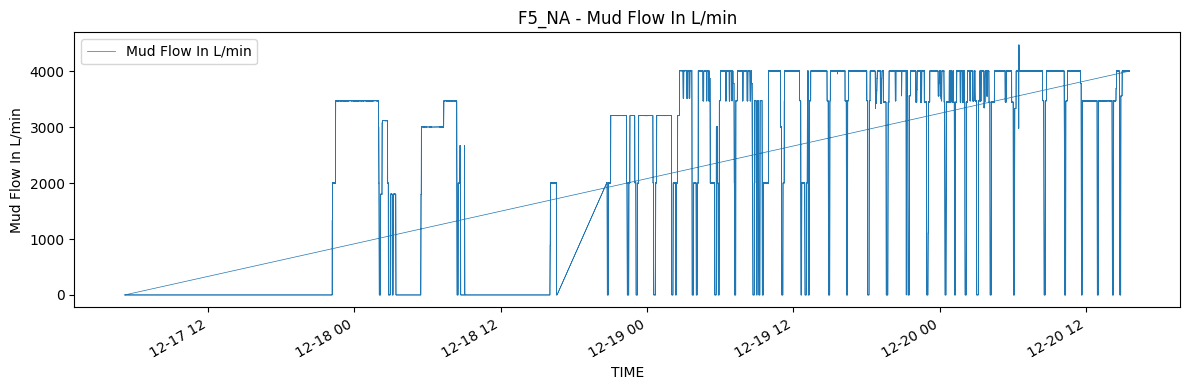


*** F1_NA ***


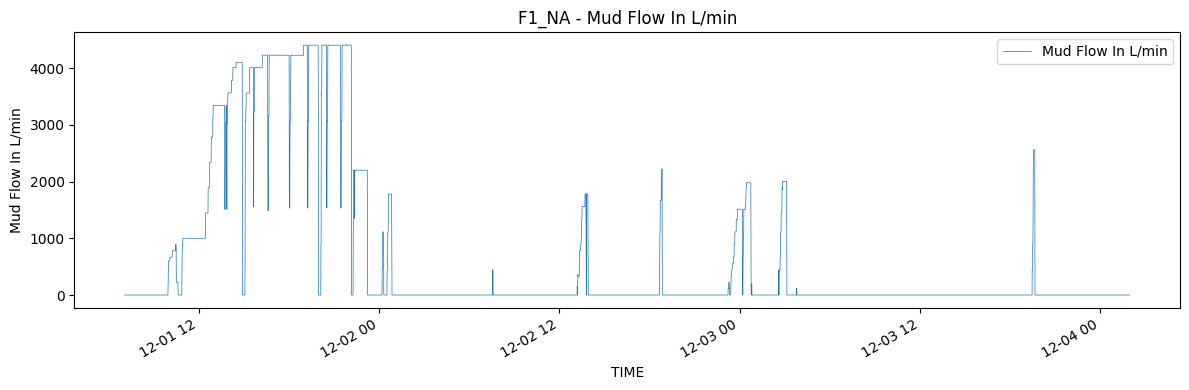


*** F7_Statoil ***


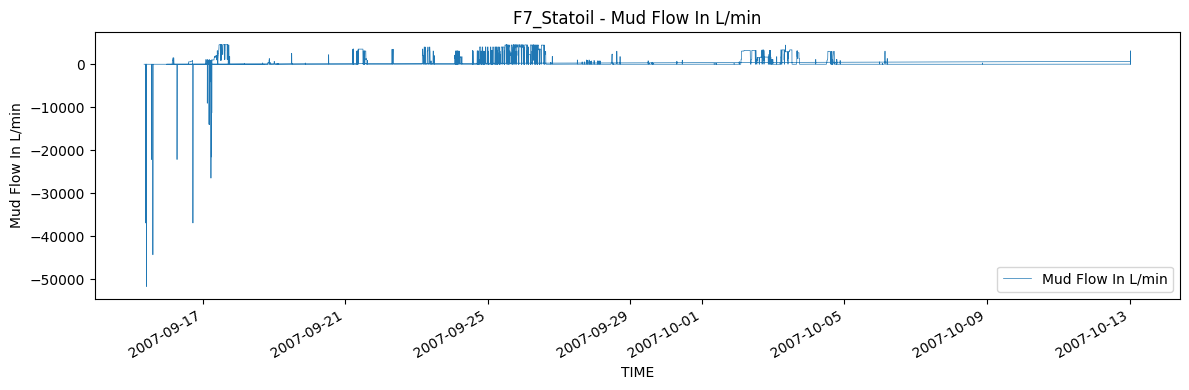


*** F9A_NA ***


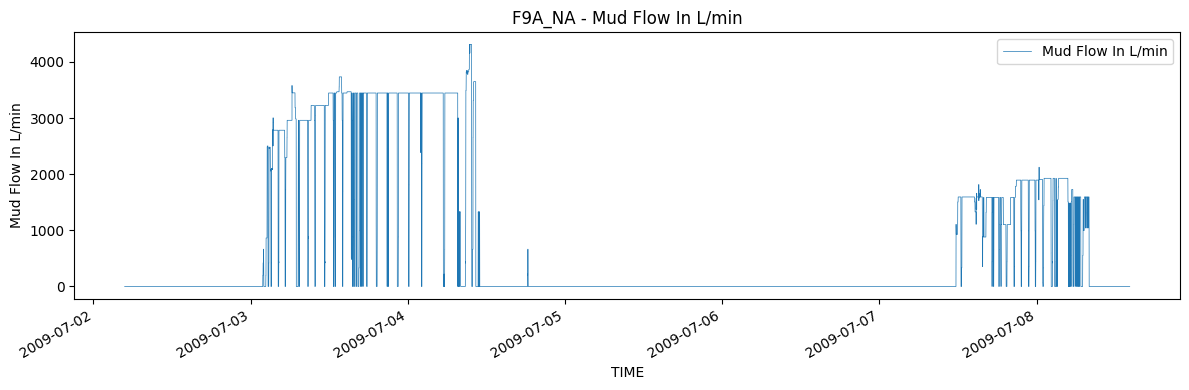


>>>>>>>> FLOW_OUT <<<<<<<<


*** F5_NA ***


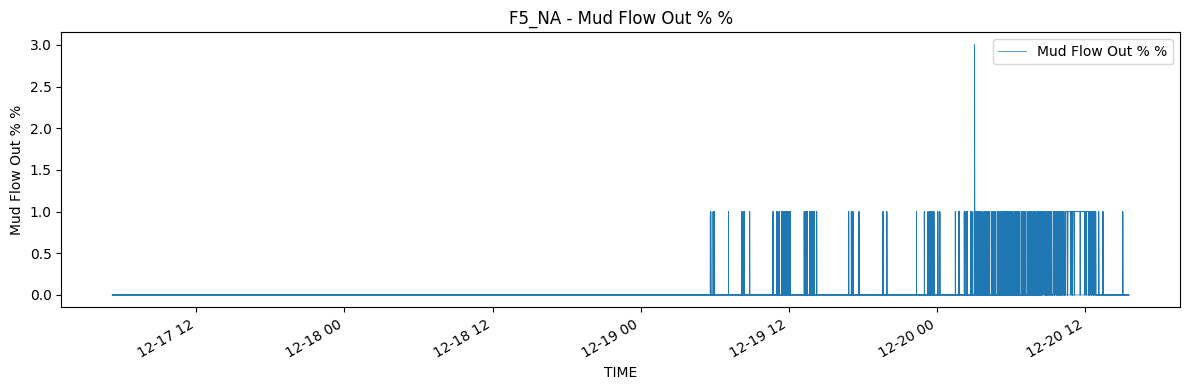


*** F1_NA ***


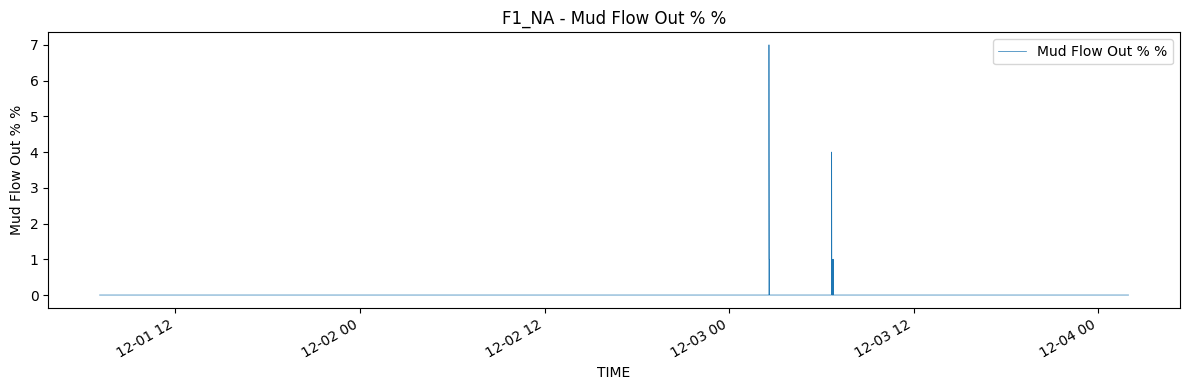


*** F7_Statoil ***


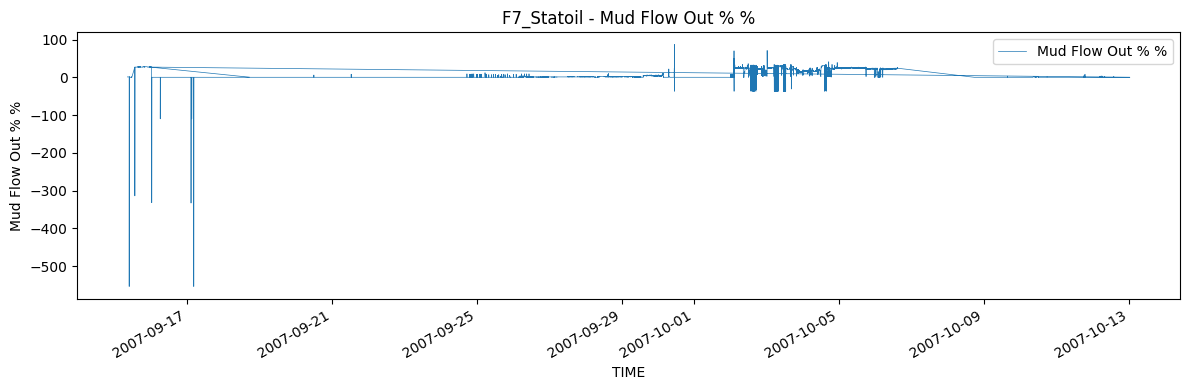

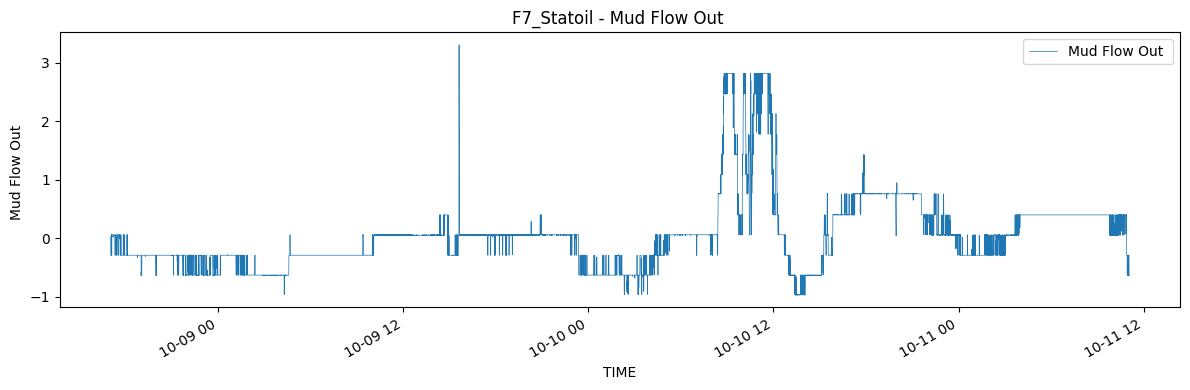


*** F9A_NA ***

>>>>>>>> BLOCK_POS <<<<<<<<


*** F5_NA ***


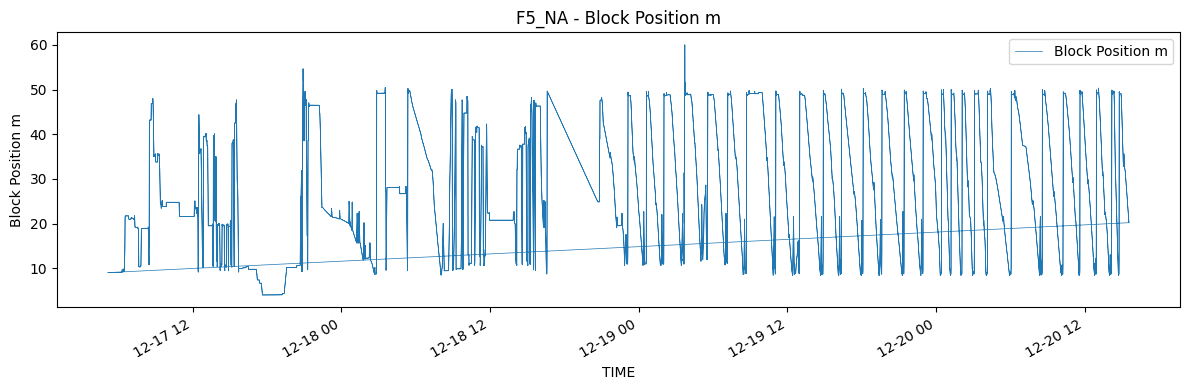


*** F1_NA ***


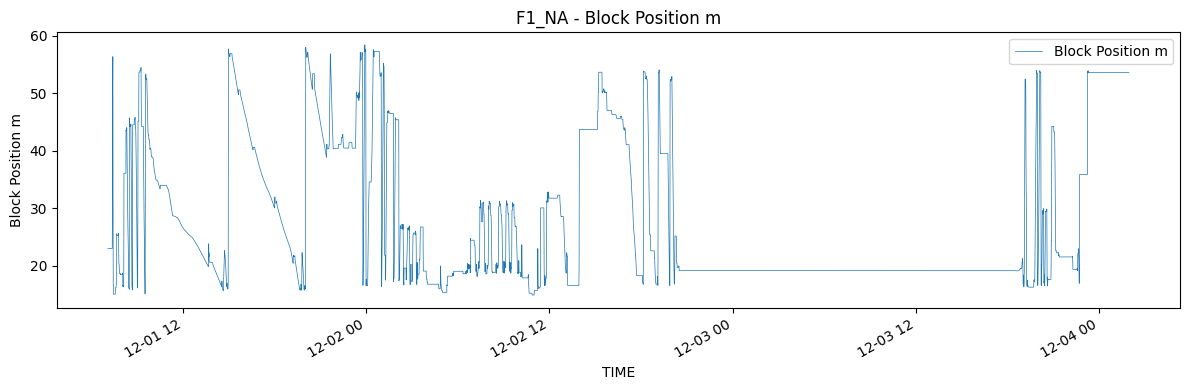


*** F7_Statoil ***


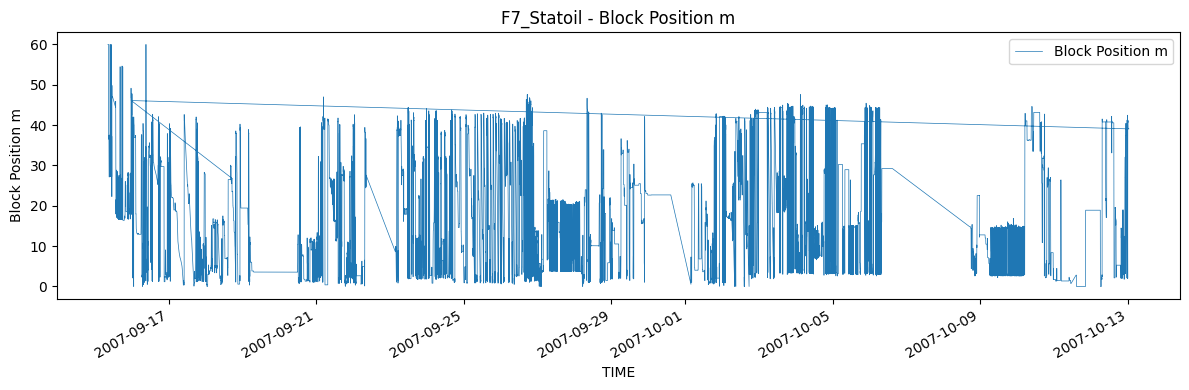


*** F9A_NA ***


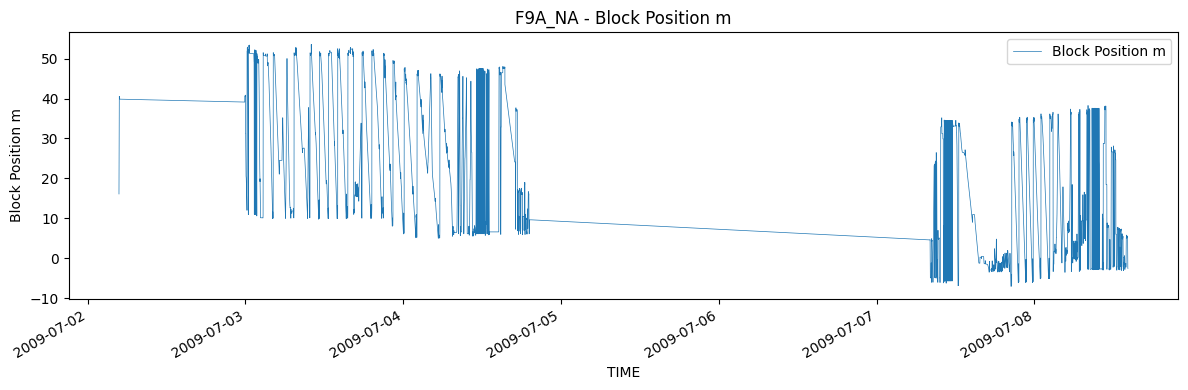


>>>>>>>> BIT_DEPTH <<<<<<<<


*** F5_NA ***


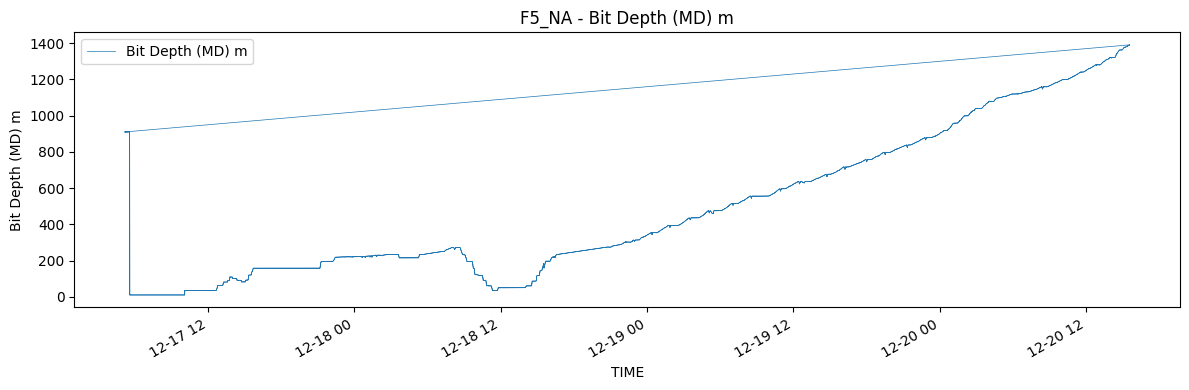


*** F1_NA ***


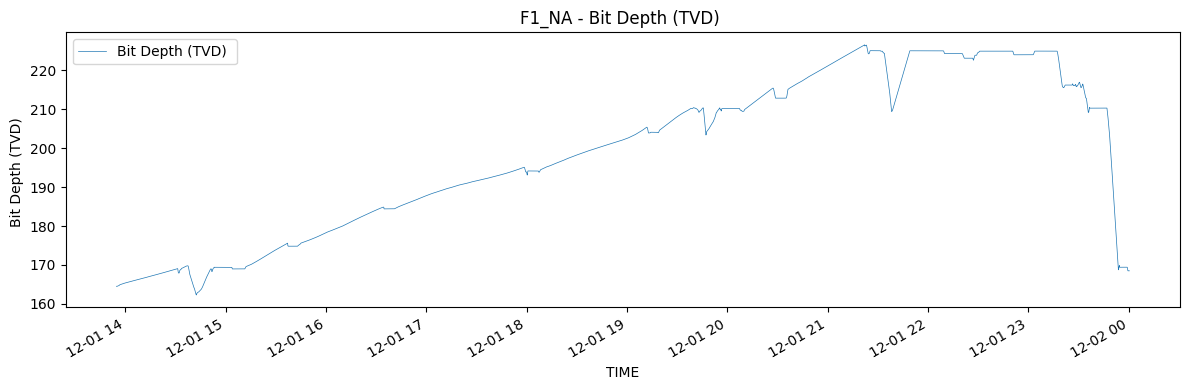

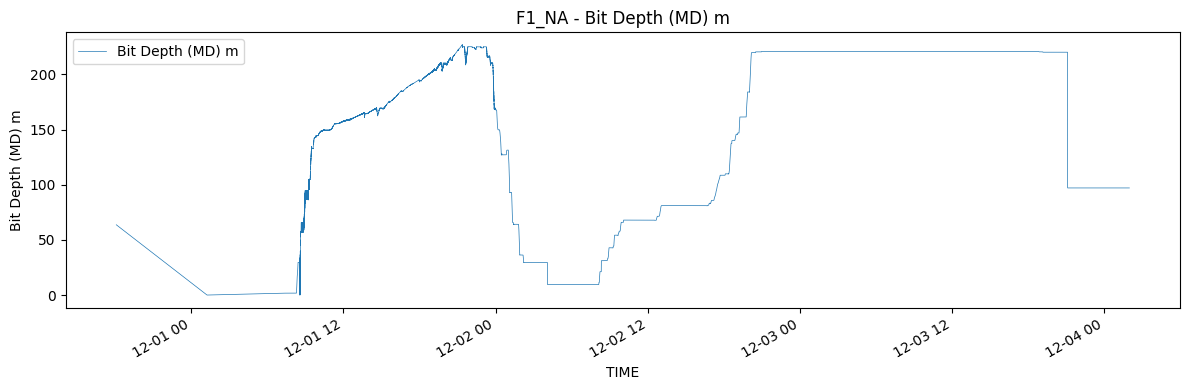


*** F7_Statoil ***


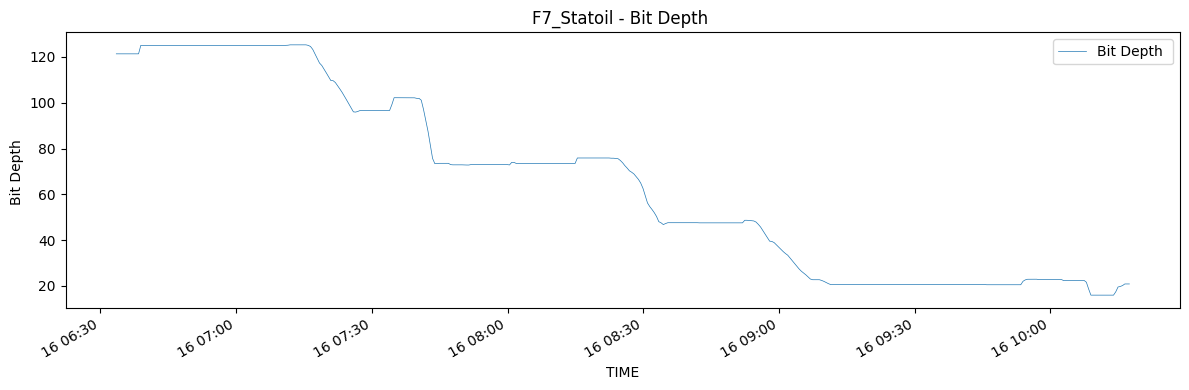

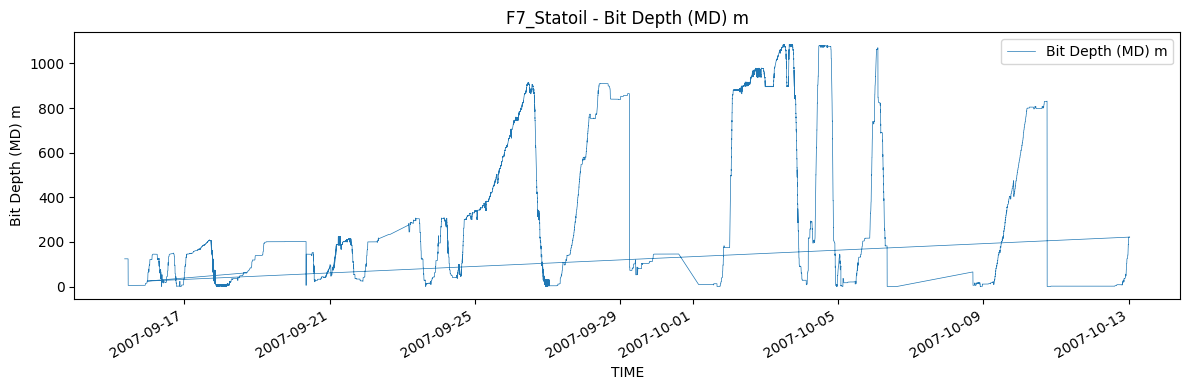

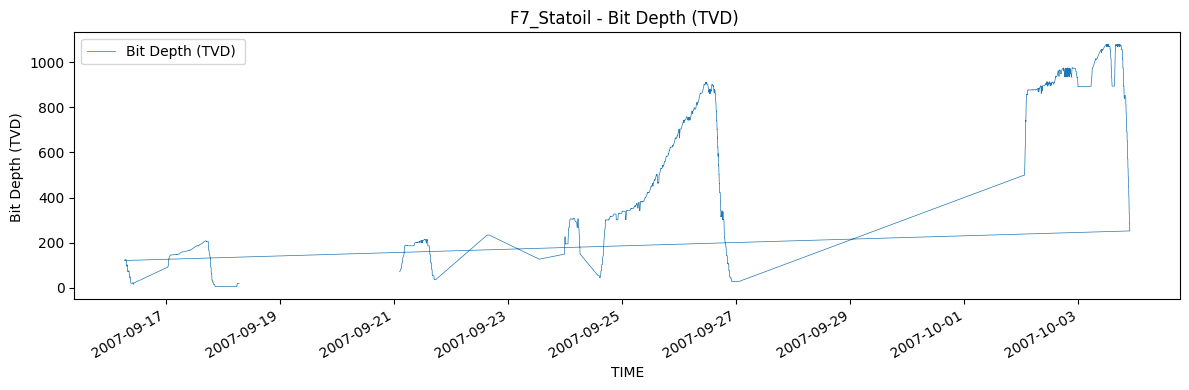


*** F9A_NA ***


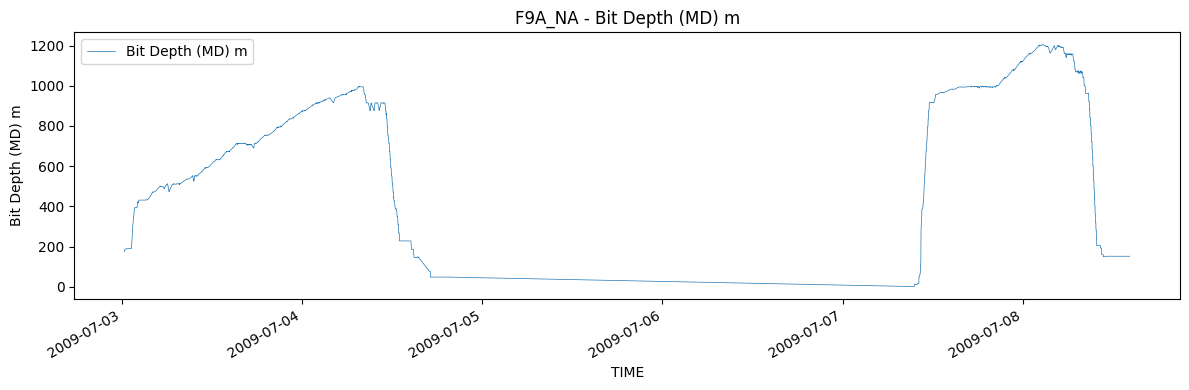

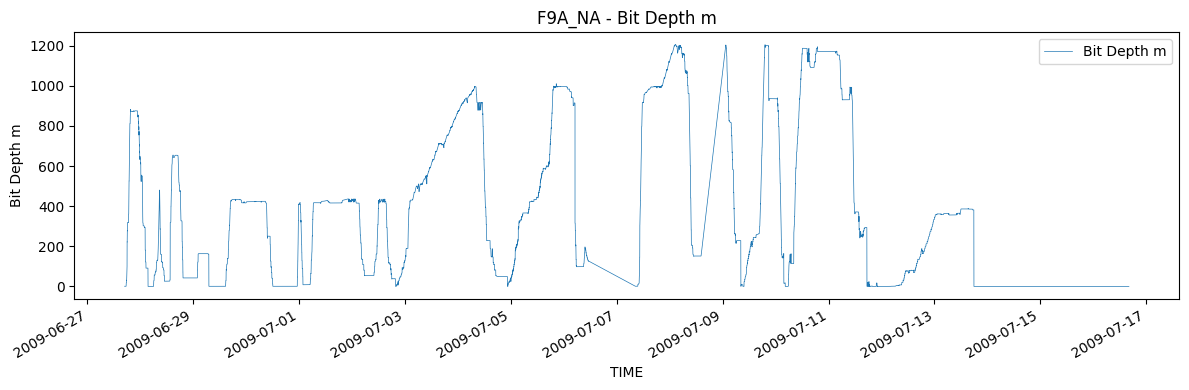

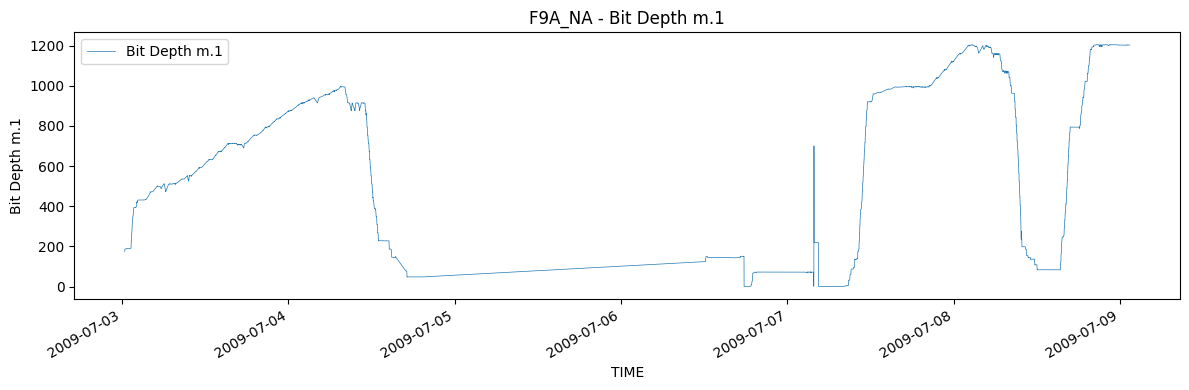


>>>>>>>> HOLE_DEPTH <<<<<<<<


*** F5_NA ***


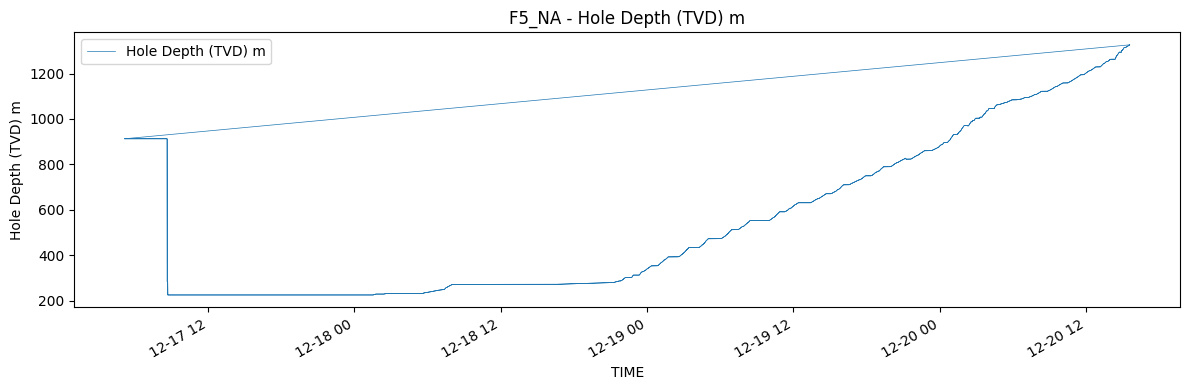

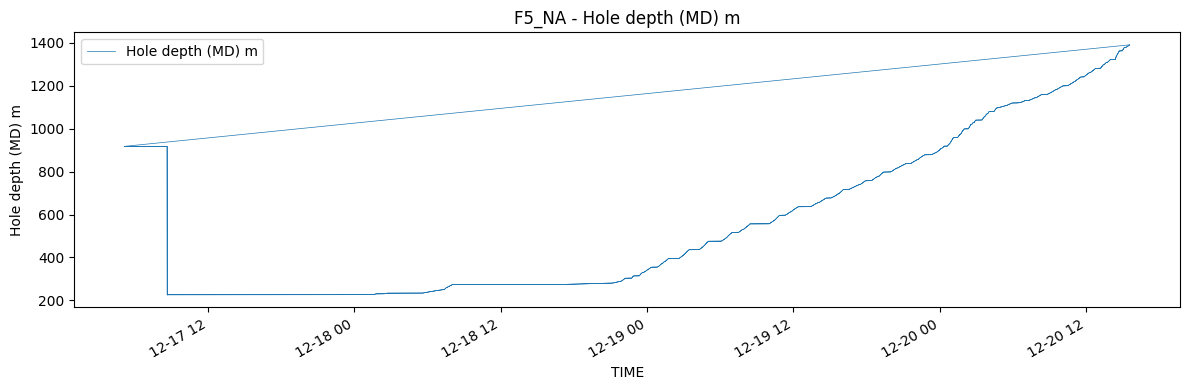


*** F1_NA ***


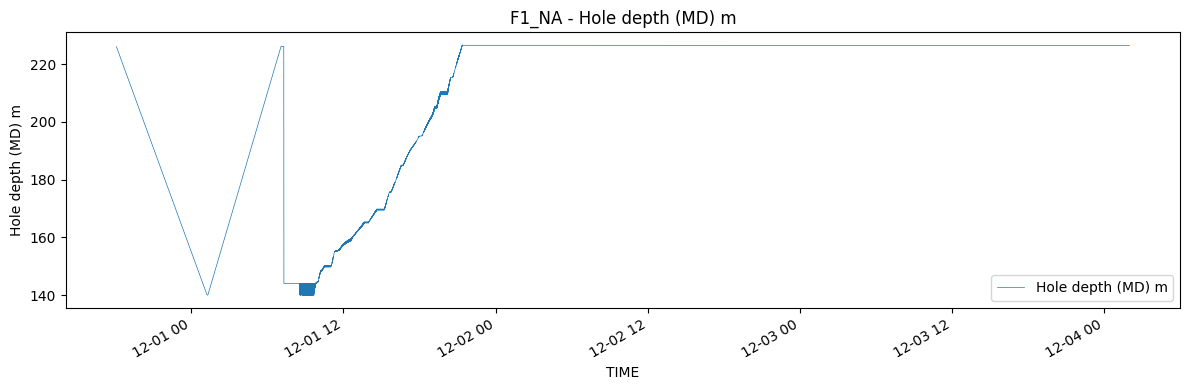

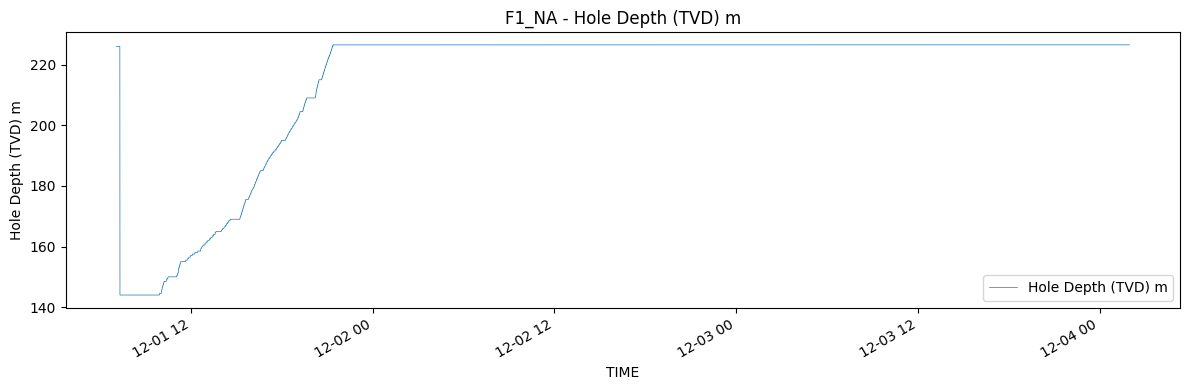


*** F7_Statoil ***


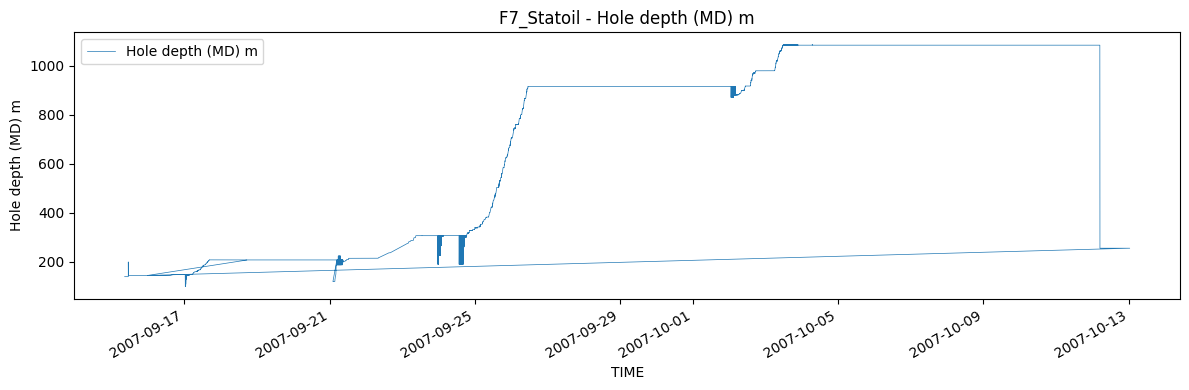

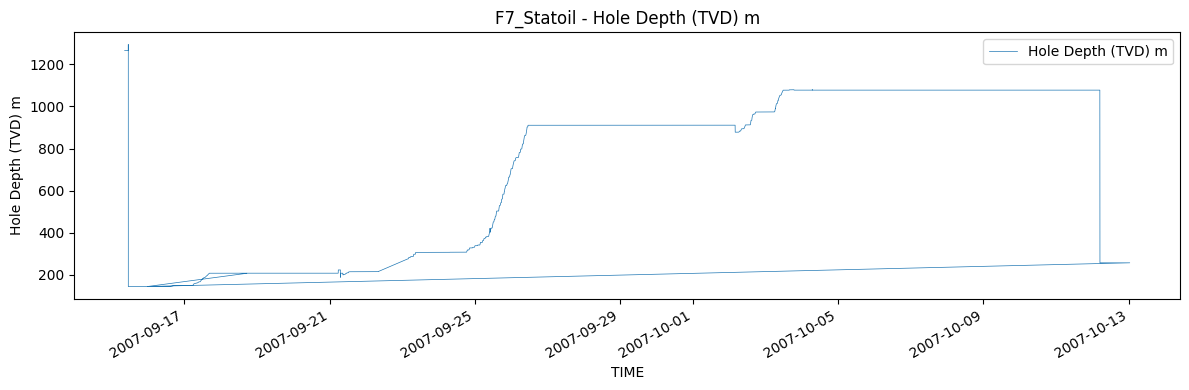


*** F9A_NA ***


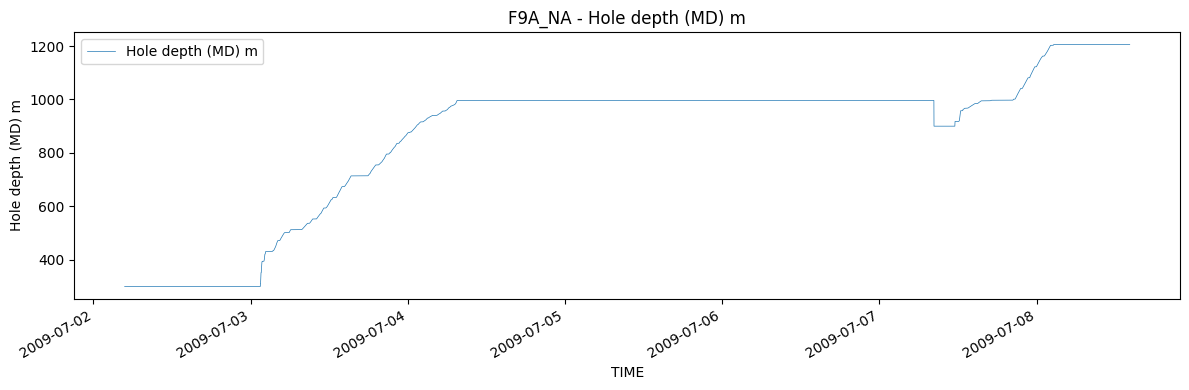

In [29]:
plot_keywords = {
    "torque":      "torque",
    "hookload":    "hookload",        # rather than just "hook"
    "rpm":         "rpm",
    "spp":         "standpipe",       # matches Average Standpipe Pressure kPa
    "flow_in":     "flow in",
    "flow_out":    "flow out",
    "block_pos":   "block position",
    "bit_depth":   "bit depth",
    "hole_depth":  "hole depth",
}


for feature_name, search_str in plot_keywords.items():
    print("\n>>>>>>>>", feature_name.upper(), "<<<<<<<<\n")
    chartgenerator(search_str, dfs)

In [17]:
# Example thresholds – you can change them later for the thesis
good = info[(info["rows"] > 10_00) & (info["missing_pct"] < 70)]

# See which wells passed the filter
good


,file,rows,cols,avg_missing,missing_pct
2,NA-NA-15_$47$_9-F-5 time.csv,118988,66,0.239742,23.974203
3,Norway-NA-15_$47$_9-F-1 time.csv,68043,116,0.617886,61.788590
5,Norway-Statoil-15_$47$_9-F-7 time.csv,547786,135,0.678834,67.883388


In [ ]:
#Ltes see how many wells the previouse cell had looke at in our folder.
len(filelist)

28

In [ ]:
# Pretty nice, then we have 28 wells that comes with time and we have the info about them, how many rows, columns and missing data average.
# Now we need to plot some of these data to see how they look like.

In [ ]:
# To do:
# Plot some of these data to see how they look like. !!

In [ ]:
# regarding the attribute_mao.csv code
rows = []
for j in filelist:
    df = pd.read_csv(j, nrows=1)
    cols = df.columns
    def pick(word):
        matches = [c for c in cols if word in c.lower()]
        return matches[0] if matches else ""
    rows.append({
        "file": j.split("\\")[-1],
        "torque_col": pick("torque"),
        "hook_col": pick("hook"),
        "rpm_col": pick("rpm"),
        "spp_col": pick("standpipe"),
        "pit_col": pick("pit"),
        "block_col": pick("block"),
        "depth_cols": ";".join([c for c in cols if "depth" in c.lower()]),
    })

pd.DataFrame(rows).to_csv("attribute_map.csv", index=False)

In [ ]:
# chart generator code
import os, random
import pandas as pd
import matplotlib.pyplot as plt

# 1) Point to your folder
folder = r"/mnt/d/VolveWITSMLasCSV"

# 2) Pick a few time files you care about
selected_files = [
    os.path.join(folder, "NA-NA-15_$47$_9-F-5 time.csv"),
    os.path.join(folder, "Norway-StatoilHydro-15_$47$_9-F-10 time.csv"),
]

def chartgenerator(searchphrase, files, sample=10000):
    """Quick plots of all columns whose name contains `searchphrase`."""
    search = searchphrase.lower()
    for j in files:
        print("Reading", os.path.basename(j))
        # count rows for sampling
        n = sum(1 for _ in open(j)) - 1
        if n > sample:
            skip = sorted(random.sample(range(1, n+1), n - sample))
        else:
            skip = None

        df = pd.read_csv(j, skiprows=skip)

        # try to find a time column (anything containing 'time')
        time_col = next((c for c in df.columns if "time" in c.lower()), None)
        if time_col:
            df[time_col] = pd.to_datetime(df[time_col], errors="coerce")
            df = df.dropna(subset=[time_col]).set_index(time_col)

        for col in df.columns:
            if search in col.lower():
                plt.figure(figsize=(12, 4))
                df[col].dropna().plot(linewidth=0.5, label=col,
                                      title=f"{os.path.basename(j)} – {col}")
                plt.legend()
                plt.xlabel("Time" if time_col else "Row index")
                plt.ylabel(col)
                plt.tight_layout()
                plt.show()

# Use it like this:
for key in ["torque", "hook", "standpipe", "pit", "block", "depth", "rpm"]:
    print("\n======", key.upper(), "======")
    chartgenerator(key, selected_files)

#

What to look for (stuck-pipe mindset)
	•	Torque / Hookload / SPP / RPM
	•	Do they move smoothly most of the time?
	•	Are there clear drilling periods (steady rotation, depth increasing)?
	•	Can you see sections where torque climbs unusually or hookload drops?
	•	Pit / Flow-related
	•	Can you see pit-level changes when the pumps start/stop?
	•	Is the pit trace flat at times (bad sensor) or mostly sensible?
	•	Block Position / Depth
	•	Does depth increase monotonically during drilling?
	•	Do you see staircase patterns when tripping (block up/down)?

If a file is just noise (flat lines, huge missing chunks), we probably don’t want it as our first test well.